데이터 출처: 데이콘 구내식당 식수 인원 예측 AI 경진대회, https://dacon.io/competitions/official/235743/data

## 1. 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
plt.rc('font', family='Malgun Gothic')
#운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     plt.rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     plt.rc('font', family='Malgun Gothic')
    
# 코랩에서 한글 깨질 때 실행
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [4]:
train = pd.read_csv(r'C:\Users\uos\Desktop\dacon\data\meal\train.csv')
test  = pd.read_csv(r'C:\Users\uos\Desktop\dacon\data\meal\test.csv')

In [5]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

In [6]:
# %%
train.shape

(1205, 12)

In [7]:
test.shape

(50, 10)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [9]:
train.isnull().sum().to_frame()

,0
일자,0
요일,0
본사정원수,0
본사휴가자수,0
본사출장자수,0
본사시간외근무명령서승인건수,0
현본사소속재택근무자수,0
조식메뉴,0
중식메뉴,0
석식메뉴,0


- 결측치가 하나도 없는 것 확인

In [10]:
train.head(10)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0
8,2016-02-16,화,2601,72,236,526,0.0,모닝롤/마늘빵 우유/두유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 어묵국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 쇠불고기 (쇠고기:호주산) 해파리겨자채 봄동...,1014.0,523.0
9,2016-02-17,수,2601,78,250,23,0.0,모닝롤/참치샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장국 쇠고기장조림 (쇠고기:호주산) 통도라지구이 ...,볶음밥*자장소스 (쌀:국내산) 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치 ...,916.0,588.0


In [11]:
train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


- 특이사항: 석식계가 0 인 part 존재 : 나중에 확인해보자

## 2. 데이터 시각화 및 전처리

- 고려해볼 사항들

1. 요일 별로 데이터의 차이가 큰 지 확인해보자
2. 일자 별로 데이터의 차이가 큰 지 확인해보자
3. 석식계가 0인 데이터 어떻게 처리할지 확인해보자.
4. 본사의 정원 수, 출장자 수,휴가자 수, 재택 근무 수 이용하여 파생변수 생성
5. text 관측치 전처리

<AxesSubplot:xlabel='요일', ylabel='석식계'>

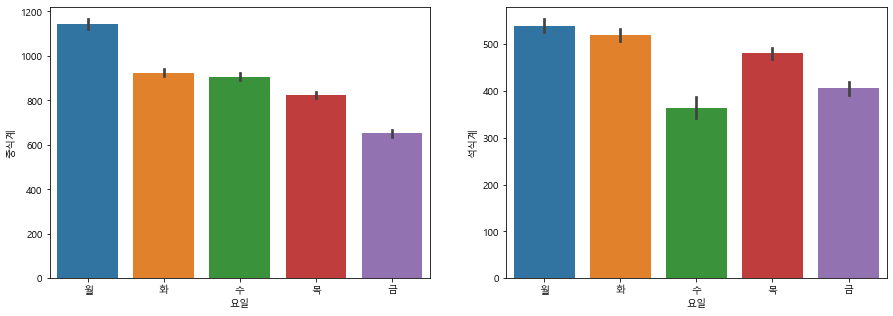

In [12]:
fig = plt.figure(figsize=(15,5))
a1 = fig.add_subplot(1,2,1)
a2 = fig.add_subplot(1,2,2)

sns.barplot(x='요일',y='중식계',data=train,ax=a1)
sns.barplot(x='요일',y='석식계',data=train,ax=a2)

- 석식계의 수요일이 가장 낮은 값을 가지는 것은 0인 데이터가존재해서 그런듯하다

In [13]:
grouped = train['중식계'].groupby(train['요일'])
grouped
grouped.size().to_frame() #size
grouped.mean().to_frame() #mean

,중식계
요일,
금,653.609959
목,823.991803
수,905.213389
월,1144.331950
화,925.620833


In [14]:
train.groupby('요일').mean()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
요일,,,,,,,
금,2807.817427,245.078838,273.680498,38.995851,37.278008,653.609959,404.979253
목,2805.815574,137.372951,255.577869,379.545082,42.389344,823.991803,480.401639
수,2805.690377,113.092050,241.405858,8.209205,45.652720,905.213389,363.615063
월,2812.049793,174.742739,204.190871,483.767635,45.518672,1144.331950,538.933610
화,2807.712500,119.004167,230.637500,457.308333,46.737500,925.620833,520.129167


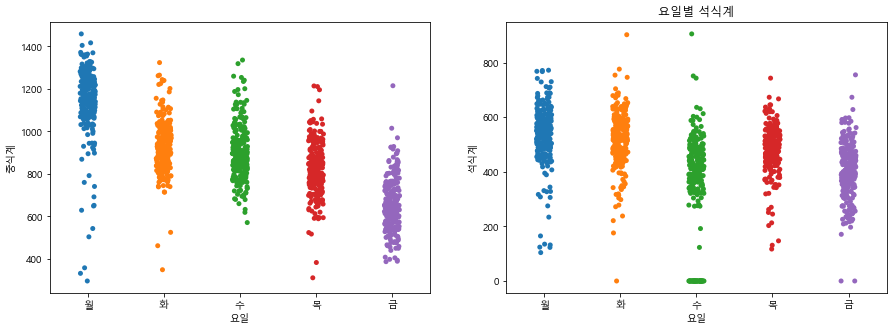

In [15]:
fig = plt.figure(figsize=(15,5))
a1 = fig.add_subplot(1,2,1)
a2 = fig.add_subplot(1,2,2)

sns.stripplot(x='요일',y='중식계',data=train,jitter=True,ax=a1)
plt.title('요일별 중식계')

sns.stripplot(x='요일',y='석식계',data=train,jitter=True,ax=a2)
plt.title('요일별 석식계')
plt.show()

- stripplot으로 확인해보니까 석식계의 수요일도 0인 관측치 제외하면 크게 떨어지지 않음을 볼 수 있음

C:\Users\uos\miniconda3\envs\dong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<Figure size 720x720 with 0 Axes>

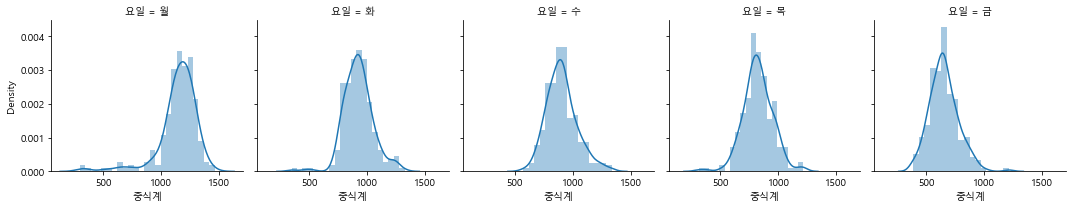

In [16]:
#%%
# grid = sns.FacetGrid(data=train, row='요일')
# grid.map(sns.scatterplot, "본사정원수", "중식계")

# grid = sns.FacetGrid(data=train, col='요일')
# grid.map(sns.scatterplot, "본사정원수", "중식계")

plt.figure(figsize=(10,10))
grid = sns.FacetGrid(data=train, col='요일')
grid.map(sns.distplot, "중식계")

C:\Users\uos\miniconda3\envs\dong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

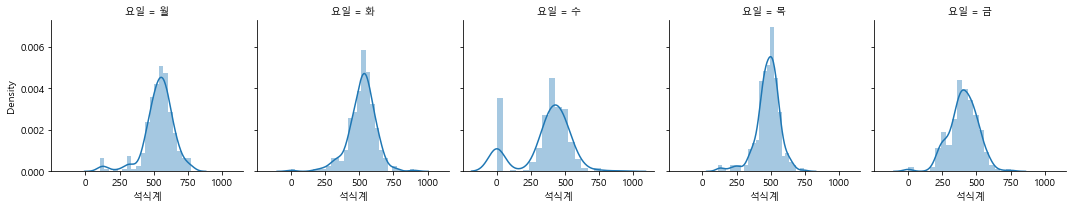

In [17]:
#%%
grid = sns.FacetGrid(data=train, col='요일')
grid.map(sns.distplot, "석식계")

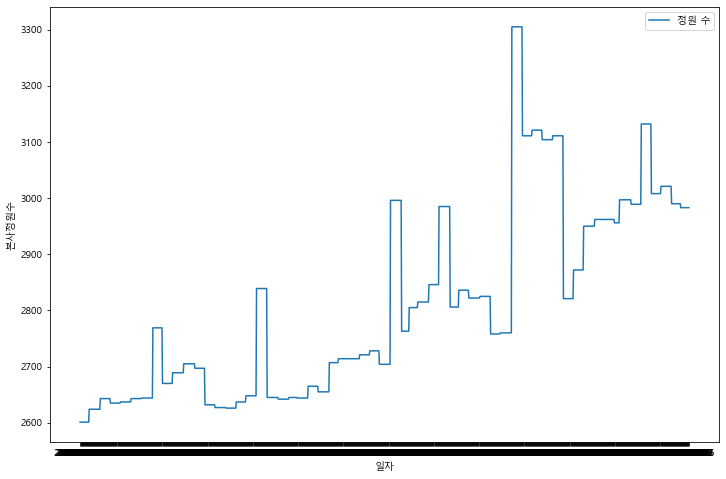

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = train , x = '일자', y = '본사정원수',label = '정원 수')
plt.show()

- 정원 수 가 점점 많아지긴 한다. - 식수인원에 영향을 줄 수도 있을듯

In [19]:
train[train.석식계==0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


- 두 날짜를 빼고는 석식계가 0인 날은 석식이 아예 나오지 않은 날이었다.
- 석식계가 0인 데이터는 석식 예측에서 제외하면 된다고 판단

### - 전처리

1. 새로운 날짜변수(년,월,일) 생성

In [20]:
#%% 날짜변수 다루기
# df['Datetime'] = df['Datetime'].apply(lambda _: datetime.strptime(_,"%m/%d/%Y, %H:%M:%S"))

# datetime으로 바꾸기
train['일자']=pd.to_datetime(train['일자'])

train['year'] = train['일자'].dt.year
train['month'] = train['일자'].dt.month
train['day'] = train['일자'].dt.day
# train['일자'].dt.weekday
# train['일자'].dt.days_in_month 그 달의 날쩌 슈
# train['일자'].dt.dayofyear
# train['일자'].dt.quarter
# train['일자'].dt.week

2. Word embedding 방법으로 메뉴변수 처리

In [21]:
#%% Word embedding
from gensim.models import Word2Vec
food_combinations = []
df_all = pd.concat([train, test])

def split_process(x, q):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_


for i in ['조식메뉴', '중식메뉴', '석식메뉴']:
    food_combinations += df_all[i].apply(lambda x: split_process(x, i)).to_list()
model = Word2Vec(sentences=food_combinations, vector_size=200, window=7, min_count=0, workers=4, sg=0, epochs=5000)


def get_food_embedding(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue # 위에 문자가 들어있으면 아래의 코드 실행안하고 넘어감 - 원산지표시 필요없어서 지워주는 역할
        if '/' in i:
            x_.extend(i.split('/')) # extend는 iterable의 각 항목들을 넣는다
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    vec_ = np.zeros(200)
    for i in x_:
        vec = model.wv.get_vector(i)
        vec_ += vec
    vec_ /= len(x_)
    return vec_

train['중식메뉴'][0].split('/')

train['중식메뉴_embedding'] = train['중식메뉴'].apply(lambda x: get_food_embedding(x))
train['석식메뉴_embedding'] = train['석식메뉴'].apply(lambda x: get_food_embedding(x))

- word embedding 과정 간단 설명

가정: 영양사분이 영양을 고려하여 비슷한 조합으로 짜려고 노력했다고 가정

(1) food_combinations라는 모든 음식을 list로 만들고 단어별로 연관성을 분석하는 Word2Vec 모델 만듬

(2) 각각의 음식을 나타내는 vector들을 만들어서 한 메뉴 관측치에서 나오는 음식들의 vector들은 다 더 해줘서 menu 관측치 vector를 만듬

3. 기상변수 추가

-- 경상남도 진주시의 기상을 추가하였다.

In [27]:
tp = pd.read_csv(r'C:\Users\uos\Desktop\dacon\data\meal\temperature.csv',encoding='cp949')
tp.fillna(0,inplace=True)
tp['일시']=pd.to_datetime(tp['일시'])
tp = tp.drop(['지점','지점명'],axis=1)

In [28]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일시              2100 non-null   datetime64[ns]
 1   최고기온(°C)        2100 non-null   float64       
 2   일강수량(mm)        2100 non-null   float64       
 3   평균 풍속(m/s)      2100 non-null   float64       
 4   평균 상대습도(%)      2100 non-null   float64       
 5   합계 3시간 신적설(cm)  2100 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 98.6 KB


In [29]:
tp.head(5)

,일시,최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 3시간 신적설(cm)
0,2016-01-01,8.7,0.0,0.6,69.4,0.0
1,2016-01-02,10.8,0.0,0.5,76.3,0.0
2,2016-01-03,14.5,0.0,0.5,77.4,0.0
3,2016-01-04,15.0,0.0,0.7,64.8,0.0
4,2016-01-05,4.9,0.0,0.5,70.6,0.0


In [30]:
train_f = pd.merge(train,tp,how='left',left_on='일자',right_on='일시')

4. 출근 수 변수 생성

In [31]:
train_f['출근'] = train_f['본사정원수']-train_f['본사휴가자수']-train_f['본사출장자수']-train_f['현본사소속재택근무자수']

5. 필요없는 변수 제거

In [32]:
train_f = train_f.drop(['일자','일시','조식메뉴','중식메뉴','석식메뉴','합계 3시간 신적설(cm)'],axis=1)
train_f = train_f.drop(['본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수'],axis=1)
train_f.describe()

,본사시간외근무명령서승인건수,중식계,석식계,year,month,day,최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),출근
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,274.117012,890.334440,461.772614,2018.052282,6.512033,15.947718,20.120913,3.919502,1.071618,66.166971,2365.253112
std,246.239651,209.505057,139.179202,1.433958,3.453906,8.650452,8.893296,13.004174,0.538971,15.606645,176.563062
min,0.000000,296.000000,0.000000,2016.000000,1.000000,1.000000,-1.900000,0.000000,0.000000,0.000000,1372.000000
25%,4.000000,758.000000,406.000000,2017.000000,4.000000,9.000000,12.600000,0.000000,0.700000,55.900000,2281.000000
50%,299.000000,879.000000,483.000000,2018.000000,7.000000,16.000000,20.600000,0.000000,1.000000,67.500000,2357.000000
75%,452.000000,1032.000000,545.000000,2019.000000,9.000000,23.000000,27.800000,0.100000,1.300000,78.100000,2461.000000
max,1044.000000,1459.000000,905.000000,2021.000000,12.000000,31.000000,37.900000,139.600000,4.400000,98.900000,2921.000000


In [33]:
train_f.head(5)

,요일,본사시간외근무명령서승인건수,중식계,석식계,year,month,day,중식메뉴_embedding,석식메뉴_embedding,최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),출근
0,월,238,1039.0,331.0,2016,2,1,"[-0.8607963025569916, 0.3704339824616909, -0.3...","[-0.6798188398991313, 0.6185276550906045, -0.5...",5.0,0.0,1.3,43.9,2401.0
1,화,319,867.0,560.0,2016,2,2,"[-0.7318149413913488, 0.003213477786630392, -0...","[0.39124196643630665, -0.018766601880391438, -...",6.2,0.0,0.8,47.5,2378.0
2,수,111,1017.0,573.0,2016,2,3,"[-1.1599844098091125, 0.37977006073508945, -0....","[-0.9879517725535801, -0.09820705652236938, 0....",7.7,0.0,0.6,57.1,2365.0
3,목,355,978.0,525.0,2016,2,4,"[-0.6846238076686859, 0.5501079242676497, -0.2...","[0.4122418363889058, 0.8420550202329954, 0.483...",7.7,0.0,0.7,53.4,2277.0
4,금,34,925.0,330.0,2016,2,5,"[-0.10641787946224213, 0.08952009677886963, -0...","[-0.1929562666586467, 0.5960469224623272, -0.4...",9.6,0.0,1.0,44.4,2142.0


6. 중식계, 석식계 데이터 나누기

-시간외 근무자 수는 석식계 예측에만 넣고, 석식계 없는날은 석식에서 데이터에서 제외하였다.

In [34]:
train_lunch = train_f.drop(['본사시간외근무명령서승인건수','석식계','석식메뉴_embedding'],axis=1)
train_dinner = train_f.drop(['중식계','중식메뉴_embedding'],axis=1)
train_dinner = train_dinner[train_dinner['석식계']>0]

## - 상관계수 확인

C:\Users\uos\miniconda3\envs\dong\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

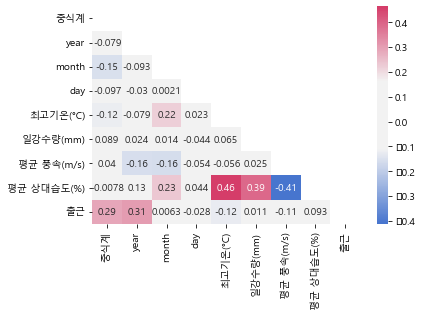

In [35]:
corr = train_lunch.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

<AxesSubplot:>

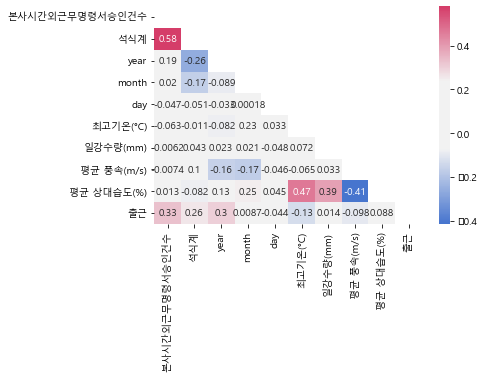

In [36]:
corr2 = train_dinner.corr()
mask2 = np.zeros_like(corr2)
mask2[np.triu_indices_from(mask2)] = True
sns.heatmap(corr2,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask2)

In [37]:
y  = train_lunch.groupby('year').mean()
m = train_lunch.groupby('month').mean()
d = train_lunch.groupby('day').mean()

<AxesSubplot:xlabel='day', ylabel='중식계'>

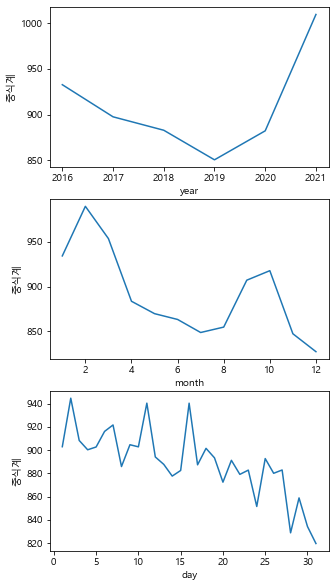

In [38]:
fig = plt.figure(figsize=(5,10))
a1 = fig.add_subplot(3,1,1)
a2 = fig.add_subplot(3,1,2)
a3 = fig.add_subplot(3,1,3)

sns.lineplot(x=y.index,y='중식계',data=y,ax=a1)
sns.lineplot(x=m.index,y='중식계',data=m,ax=a2)
sns.lineplot(x=d.index,y='중식계',data=d,ax=a3)

- 월별 평균으로 봤을 때 2,3월이 가장 구내식당 이용 인원이 많다. 봄, 가을에 이용 인원이 많고 여름,가을에 떨어짐
- 일별 평균으로 봤을 때 말일이 될 수록 이용인원이 줄어듬.

<AxesSubplot:xlabel='day', ylabel='석식계'>

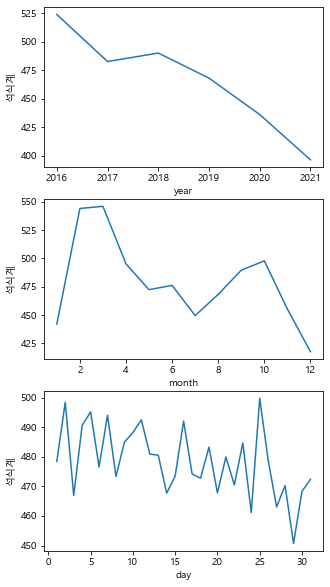

In [39]:
y2  = train_dinner.groupby('year').mean()
m2 = train_dinner.groupby('month').mean()
d2 = train_dinner.groupby('day').mean()

fig = plt.figure(figsize=(5,10))
a1 = fig.add_subplot(3,1,1)
a2 = fig.add_subplot(3,1,2)
a3 = fig.add_subplot(3,1,3)
sns.lineplot(x=y2.index,y='석식계',data=y2,ax=a1)
sns.lineplot(x=m2.index,y='석식계',data=m2,ax=a2)
sns.lineplot(x=d2.index,y='석식계',data=d2,ax=a3)

- 월별, 일별은 중식계와 비슷하게 나타남
- 각 변수가 영향이 있을 것 처럼 보이긴 한다.

전체 연도-월별 lineplot 흐름 보기

In [40]:
train_f['y-m']=train[['year','month']].astype(str).apply(lambda x: '-'.join(x), axis=1)
train_f['y-m']=pd.to_datetime(train_f['y-m'])

In [41]:
ym = train_f.groupby('y-m').mean()

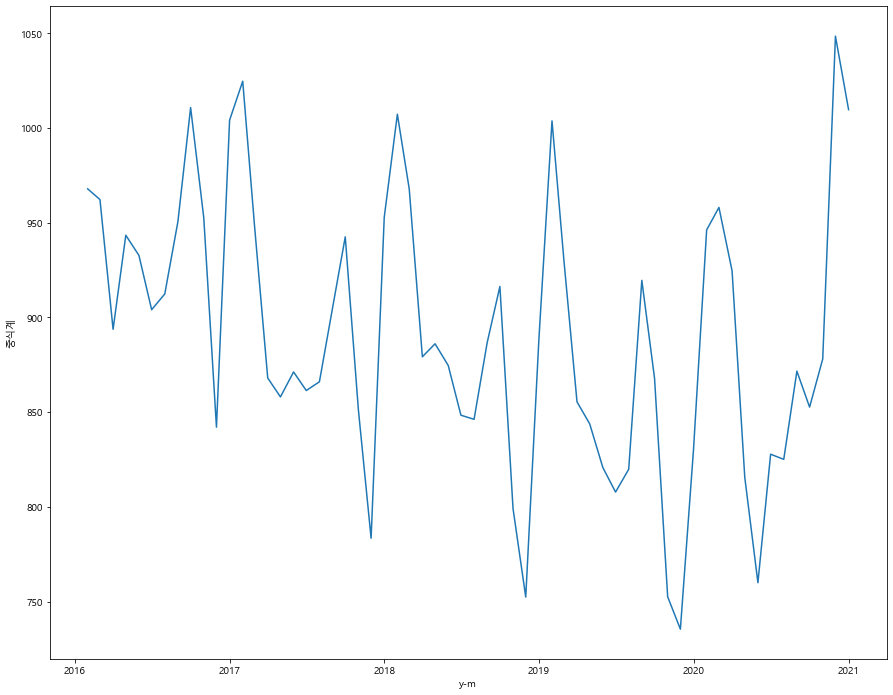

In [42]:
plt.figure(figsize=(15, 12))
sns.lineplot(x=ym.index,y='중식계',data=ym)
plt.show()

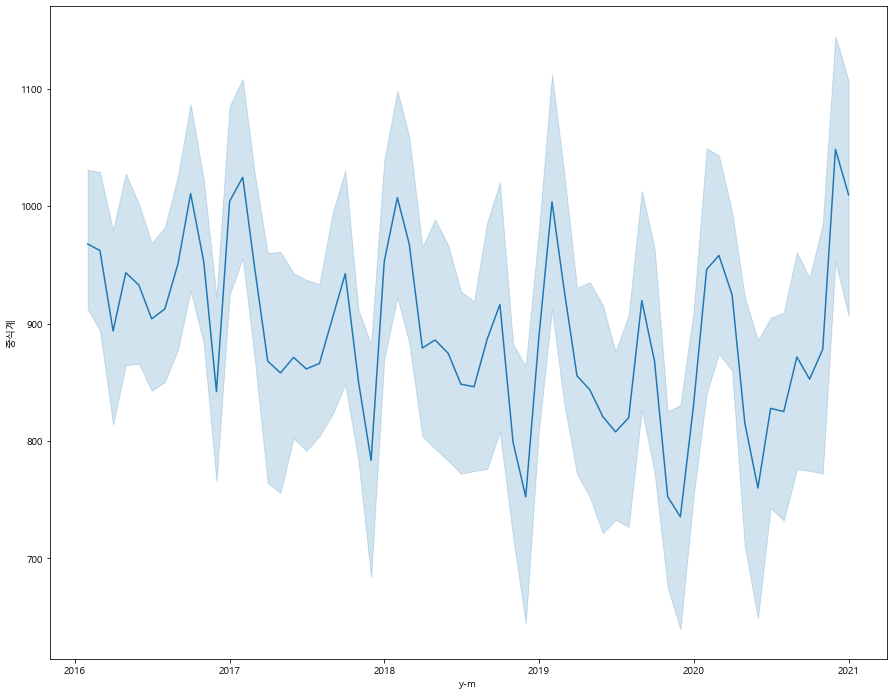

In [43]:
plt.figure(figsize=(15, 12))
sns.lineplot(x='y-m',y='중식계',data=train_f)
plt.show()

- 이렇게 그려도 선은 평균으로 나오는 듯

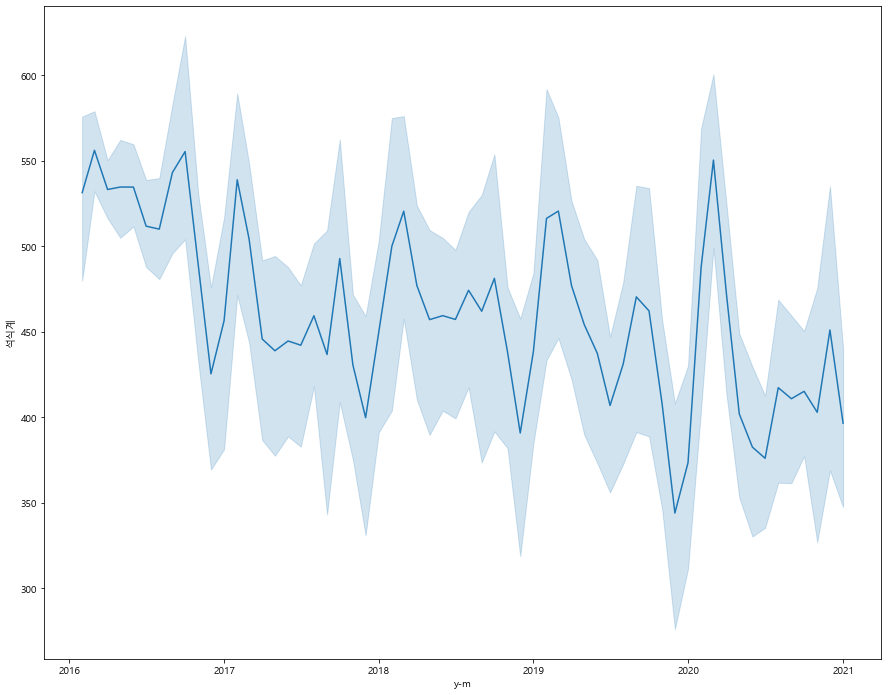

In [44]:
plt.figure(figsize=(15, 12))
sns.lineplot(x='y-m',y='석식계',data=train_f)
plt.show()

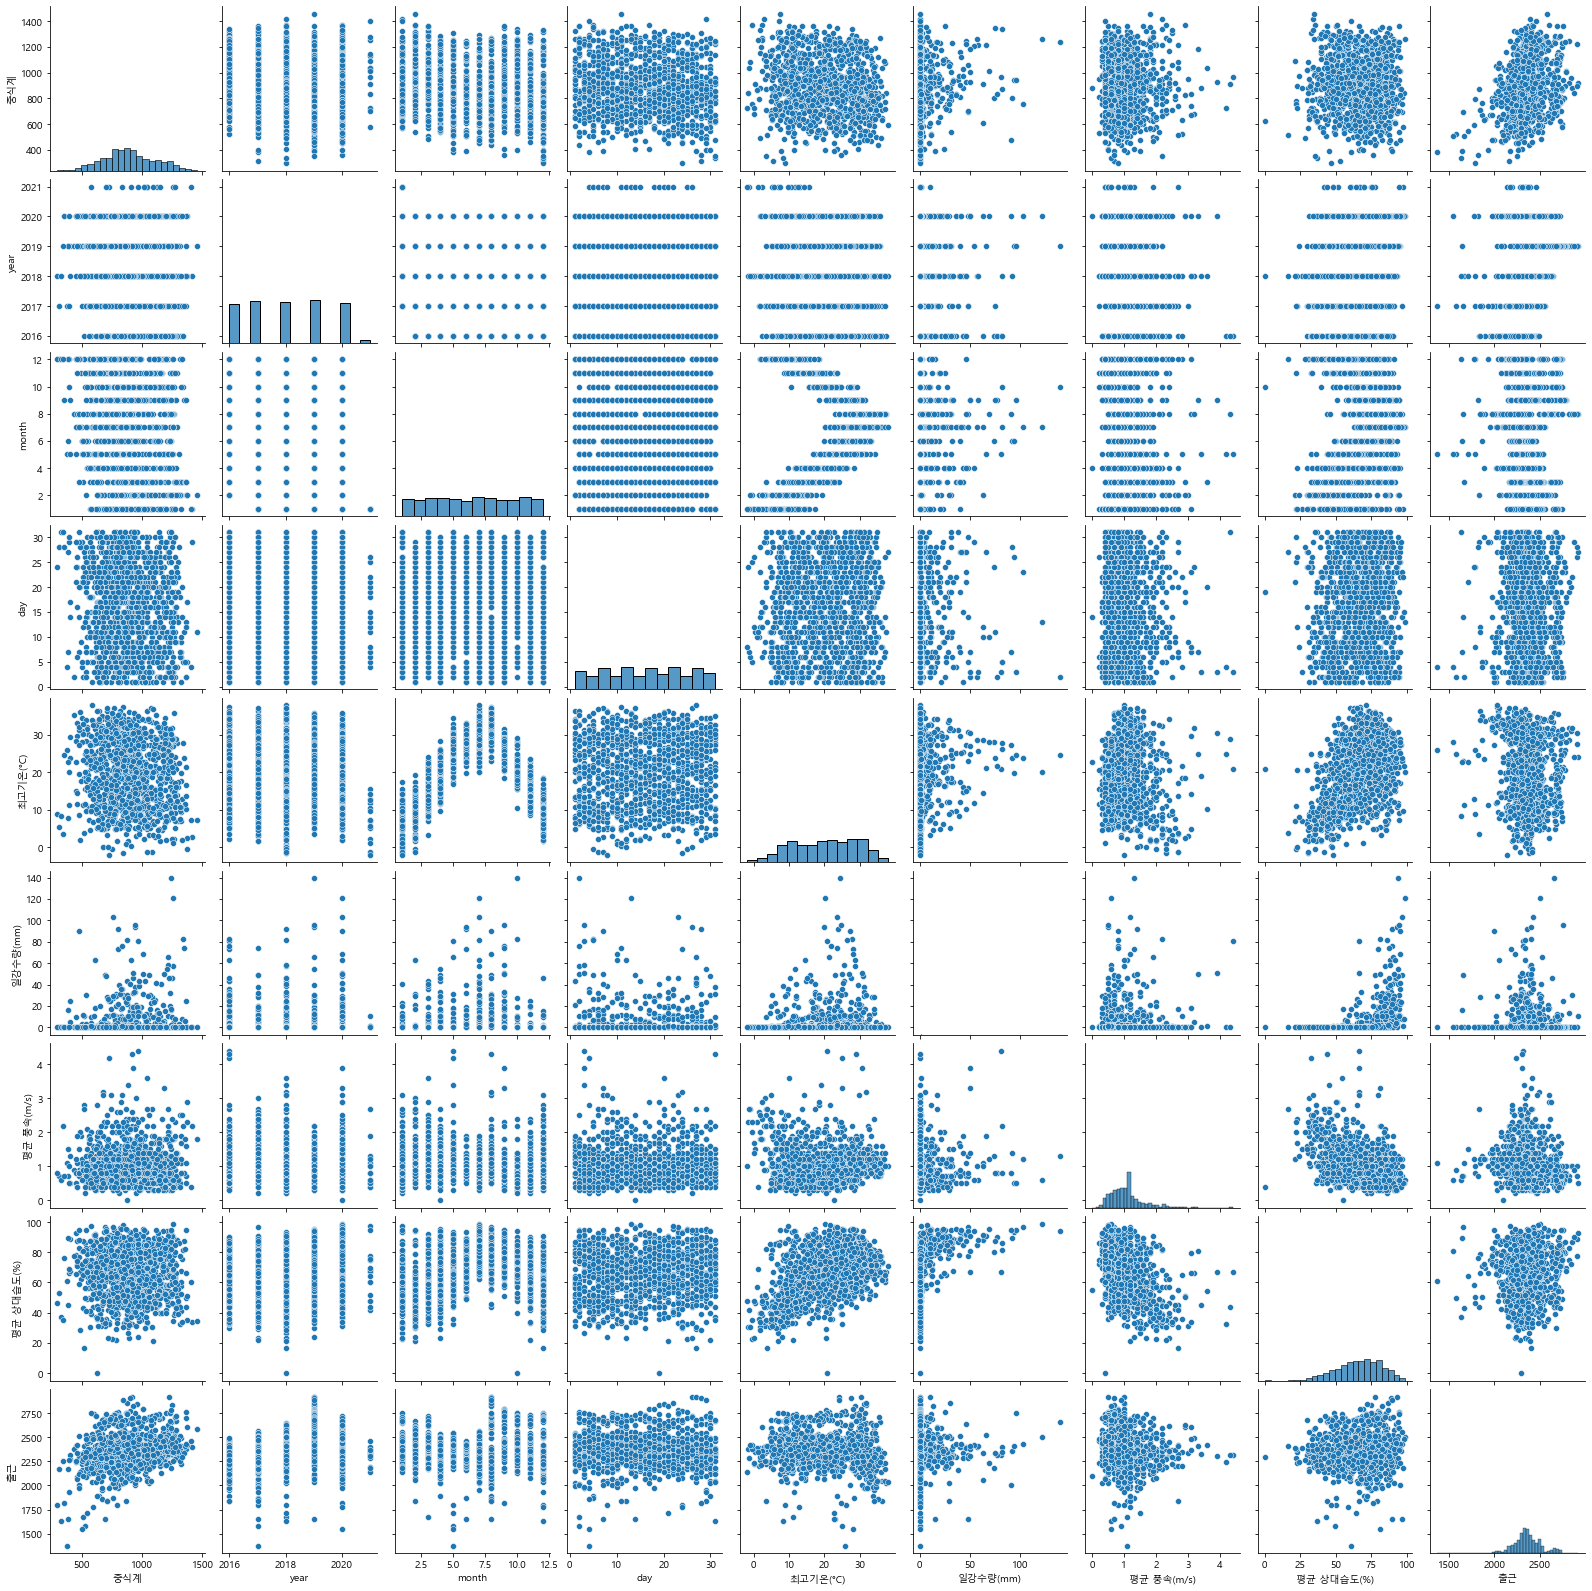

In [45]:
sns.pairplot(train_lunch)

In [46]:
# test data 에도 적용
test['일자']=pd.to_datetime(test['일자'])

test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day

test['중식메뉴_embedding'] = test['중식메뉴'].apply(lambda x: get_food_embedding(x))
test['석식메뉴_embedding'] = test['석식메뉴'].apply(lambda x: get_food_embedding(x))

test_f = pd.merge(test,tp,how='left',left_on='일자',right_on='일시')
test_f = test_f.drop(['일자','일시','조식메뉴','중식메뉴','석식메뉴','합계 3시간 신적설(cm)'],axis=1)

test_f['출근'] = test_f['본사정원수']-test_f['본사휴가자수']-test_f['본사출장자수']-test_f['현본사소속재택근무자수']


test_f = test_f.drop(['본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수'],axis=1)

test_lunch = test_f.drop(['본사시간외근무명령서승인건수','석식메뉴_embedding'],axis=1)
test_dinner = test_f.drop(['중식메뉴_embedding'],axis=1)

In [47]:
train_lunch

,요일,중식계,year,month,day,중식메뉴_embedding,최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),출근
0,월,1039.0,2016,2,1,"[-0.8607963025569916, 0.3704339824616909, -0.3...",5.0,0.0,1.3,43.9,2401.0
1,화,867.0,2016,2,2,"[-0.7318149413913488, 0.003213477786630392, -0...",6.2,0.0,0.8,47.5,2378.0
2,수,1017.0,2016,2,3,"[-1.1599844098091125, 0.37977006073508945, -0....",7.7,0.0,0.6,57.1,2365.0
3,목,978.0,2016,2,4,"[-0.6846238076686859, 0.5501079242676497, -0.2...",7.7,0.0,0.7,53.4,2277.0
4,금,925.0,2016,2,5,"[-0.10641787946224213, 0.08952009677886963, -0...",9.6,0.0,1.0,44.4,2142.0
...,...,...,...,...,...,...,...,...,...,...,...
1200,수,1093.0,2021,1,20,"[0.27520913547939724, 0.21818795137935215, 0.5...",10.6,0.0,0.5,64.0,2319.0
1201,목,832.0,2021,1,21,"[-0.11776044368743896, 0.3695798436878249, 0.6...",12.6,1.7,0.6,77.8,2309.0
1202,금,579.0,2021,1,22,"[0.13475469180515834, 0.5177354283264971, 0.33...",9.8,1.2,0.5,97.5,2177.0
1203,월,1145.0,2021,1,25,"[-0.01552341878414154, 0.05990129634737969, 0....",14.3,0.0,1.0,75.8,2396.0


### 분석이 가능한 data set으로 만들어주기

In [48]:
x_tr_lunch = train_lunch.drop(['중식메뉴_embedding','중식계'],axis=1)
x_tr_lunch = pd.get_dummies(x_tr_lunch)

In [49]:
x_tr_lunch

,year,month,day,최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),출근,요일_금,요일_목,요일_수,요일_월,요일_화
0,2016,2,1,5.0,0.0,1.3,43.9,2401.0,0,0,0,1,0
1,2016,2,2,6.2,0.0,0.8,47.5,2378.0,0,0,0,0,1
2,2016,2,3,7.7,0.0,0.6,57.1,2365.0,0,0,1,0,0
3,2016,2,4,7.7,0.0,0.7,53.4,2277.0,0,1,0,0,0
4,2016,2,5,9.6,0.0,1.0,44.4,2142.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021,1,20,10.6,0.0,0.5,64.0,2319.0,0,0,1,0,0
1201,2021,1,21,12.6,1.7,0.6,77.8,2309.0,0,1,0,0,0
1202,2021,1,22,9.8,1.2,0.5,97.5,2177.0,1,0,0,0,0
1203,2021,1,25,14.3,0.0,1.0,75.8,2396.0,0,0,0,1,0


In [50]:
emb_lunch = train_lunch['중식메뉴_embedding'].to_numpy().tolist()

In [52]:
x_train_lunch = np.concatenate((x_tr_lunch.to_numpy(),emb_lunch),axis=1)

In [53]:
x_tr_dinner = train_dinner.drop(['석식메뉴_embedding','석식계'],axis=1)
x_tr_dinner = pd.get_dummies(x_tr_dinner)
emb_dinner = train_dinner['석식메뉴_embedding'].to_numpy().tolist()
x_train_dinner = np.concatenate((x_tr_dinner.to_numpy(),emb_dinner),axis=1)

y_train_lunch = train_lunch['중식계']
y_train_dinner = train_dinner['석식계']

In [54]:
x_te_lunch = test_lunch.drop(['중식메뉴_embedding'],axis=1)
x_te_lunch = pd.get_dummies(x_te_lunch)
emb_te_lunch = test_lunch['중식메뉴_embedding'].to_numpy().tolist()
x_test_lunch = np.concatenate((x_te_lunch.to_numpy(),emb_te_lunch),axis=1)

x_te_dinner = test_dinner.drop(['석식메뉴_embedding'],axis=1)
x_te_dinner = pd.get_dummies(x_te_dinner)
emb_te_dinner = test_dinner['석식메뉴_embedding'].to_numpy().tolist()
x_test_dinner = np.concatenate((x_te_dinner.to_numpy(),emb_te_dinner),axis=1)

In [55]:
type(y_train_dinner)

pandas.core.series.Series

## 3. 모델링

### (a) 중식계

### (1) Randomforest

Hyperparameter 들을 조정하여 좀 더 좋은 값을 내도록 조정해보도록 하는 것이 맞지만 여기서 Hyperparameter 들을 조정한다고 해서 크게 값이 달라지지 않는다고 판단하여 시간 관계상 임의로 하이퍼파라미터를 지정해주었다.

In [56]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from typing import Dict, Tuple, Union, List

In [65]:
def kfold_rf(
    params: Dict[str, Union[int, float, str, bool]],
    n_fold: int,
    X: np.array,
    y: pd.DataFrame,
    X_test: np.array,
) -> Tuple[np.array, np.array]:

    folds = KFold(n_splits=n_fold, shuffle=True, random_state=40)
    splits = folds.split(X, y)
    rf_oof = np.zeros((X.shape[0],))
    rf_preds = np.zeros((X_test.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        model = RandomForestRegressor(**params)
        model.fit(X_train,y_train)

        rf_oof[valid_idx] = model.predict(X_valid)
        rf_preds += model.predict(X_test)
        print(f"Mean_absolute_error: {mean_absolute_error(y_valid, rf_oof[valid_idx]):.5f}")
        
    rf_preds = rf_preds/n_fold
    mean_absolute_error_score = mean_absolute_error(y, rf_oof)
    print(f"\n========================\n")
    print(f"Mean_absolute_error Score: {mean_absolute_error_score:.5f}")
    
    return rf_oof, rf_preds

rf_params = {
        "criterion": "mse",
        "n_estimators": 500,
        "min_samples_split": 20,
        "min_samples_leaf": 2,
        "max_features": "auto",
        "oob_score": True,
        "random_state": 40,
        "n_jobs": -1,
    }

rf_oof, rf_preds = kfold_rf(rf_params, 10, x_train_lunch, y_train_lunch, x_test_lunch)

============ Fold 0 ============

Mean_absolute_error: 89.70473
============ Fold 1 ============

Mean_absolute_error: 93.71811
============ Fold 2 ============

Mean_absolute_error: 80.38087
============ Fold 3 ============

Mean_absolute_error: 99.70735
============ Fold 4 ============

Mean_absolute_error: 86.90637
============ Fold 5 ============

Mean_absolute_error: 98.36817
============ Fold 6 ============

Mean_absolute_error: 77.35641
============ Fold 7 ============

Mean_absolute_error: 84.13597
============ Fold 8 ============

Mean_absolute_error: 90.99071
============ Fold 9 ============

Mean_absolute_error: 90.59427


Mean_absolute_error Score: 89.19002


### (2) XGboost

XGboost 는 두 가지 방법으로 하이퍼 파라미터를 조정하여 모델링해보았다.

하이퍼파라미터를 조정하는 방법은 python의 optuna 함수를 이용하여 조정하였다.

- 첫 번째 : Holdout 방법을 이용하여 모델링을 만들어 가장 좋은 hyperparameter 를 찾고 그 Parameter들을 Cross-validation 을 이용하여 만든 
          모델에 넣어 예측을 해보았다

- 두 번째 : K-Fold Cross validation 방법을 이용하여 하이퍼파라미터를 조정하여 모델링을 만들었다.

In [77]:
def objectiveXGB(trial: Trial, X, y, test):
    param = {
        "n_estimators" : trial.suggest_int('n_estimators', 500, 2000),
        'max_depth':trial.suggest_int('max_depth', 8, 20),
        'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
        'gamma':trial.suggest_int('gamma', 0.5, 3),
        'learning_rate': 0.01,
        'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.5, 1, 0.1),
        'nthread' : -1,
        'tree_method': 'hist',
        'predictor': 'cpu_predictor',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0] ),
        'random_state': 40
    }
    y = np.array(y_train_lunch)
    X_train, X_test, y_train, y_test = train_test_split(X, y.flatten(), test_size=0.1)
    
    y_train = y_train.reshape(-1, 1)
    y_test  = y_test.reshape(-1, 1)

    model = XGBRegressor(**param)
    xgb_model = model.fit(X_train, y_train, verbose=False, eval_set=[(X_test, y_test)])
    score = mean_squared_error(xgb_model.predict(X_test), y_test, squared=False)

    return score

study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(lambda trial : objectiveXGB(trial, x_train_lunch,  y_train_lunch, x_test_lunch), n_trials=50)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

[I 2021-10-06 14:17:20,062] A new study created in memory with name: no-name-1ebf079c-c25c-423d-afb1-ccc44bbeb462
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(
[I 2021-10-06 14:17:34,836] Trial 0 finished with value: 101.41675121285819 and parameters: {'n_estimators': 740, 'max_depth': 11, 'min_child_weight': 11, 'gamma': 2, 'colsample_bytree': 0.8, 'lambda': 0.1640284226413976, 'alpha': 0.08953503415193086, 'subsample': 0.6}. Best is trial 0 with value: 101.41675121285819.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(
[I 2021-10-06 14:18:59,531] Trial 1 finished with value: 120.7883506267179 and para

[I 2021-10-06 14:27:59,070] Trial 14 finished with value: 106.08883675265642 and parameters: {'n_estimators': 1102, 'max_depth': 16, 'min_child_weight': 7, 'gamma': 2, 'colsample_bytree': 0.9, 'lambda': 1.0169008891764173, 'alpha': 0.6968985732962358, 'subsample': 0.7}. Best is trial 11 with value: 94.34361644786709.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(
[I 2021-10-06 14:28:13,460] Trial 15 finished with value: 95.22065243344258 and parameters: {'n_estimators': 794, 'max_depth': 16, 'min_child_weight': 14, 'gamma': 2, 'colsample_bytree': 0.7, 'lambda': 0.03891023744064372, 'alpha': 0.0030339947538422624, 'subsample': 0.6}. Best is trial 11 with value: 94.34361644786709.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is spe

C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(
[I 2021-10-06 14:33:00,227] Trial 29 finished with value: 109.39613389878491 and parameters: {'n_estimators': 994, 'max_depth': 12, 'min_child_weight': 13, 'gamma': 2, 'colsample_bytree': 1.0, 'lambda': 0.032477627253969014, 'alpha': 0.007412336832483655, 'subsample': 0.6}. Best is trial 11 with value: 94.34361644786709.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(
[I 2021-10-06 14:33:49,648] Trial 30 finished with value: 114.4755004534202 and parameters: {'n_estimators': 1210, 'max_depth': 19, 'min_child_weight': 5, 'gamma': 2, 'colsample_bytree': 0.6, '

[I 2021-10-06 14:37:32,383] Trial 43 finished with value: 111.01714354267146 and parameters: {'n_estimators': 1977, 'max_depth': 12, 'min_child_weight': 14, 'gamma': 2, 'colsample_bytree': 0.8, 'lambda': 0.3261441848649366, 'alpha': 6.484783519651232, 'subsample': 0.6}. Best is trial 34 with value: 84.00288295806223.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(
[I 2021-10-06 14:37:49,967] Trial 44 finished with value: 104.50525191745936 and parameters: {'n_estimators': 837, 'max_depth': 13, 'min_child_weight': 17, 'gamma': 2, 'colsample_bytree': 0.7, 'lambda': 0.21088530183719031, 'alpha': 0.8507711211135348, 'subsample': 0.6}. Best is trial 34 with value: 84.00288295806223.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is speci

Best trial: score 84.00288295806223,
params {'n_estimators': 1024, 'max_depth': 10, 'min_child_weight': 17, 'gamma': 2, 'colsample_bytree': 0.8, 'lambda': 0.6392036069882681, 'alpha': 0.26984661495602014, 'subsample': 0.6}


In [78]:
best_param = study.best_trial.params

In [82]:
from xgboost import XGBRegressor

def kfold_xgb(
    params: Dict[str, Union[int, float, str]],
    n_fold: int,
    X: np.array,
    y: pd.DataFrame,
    X_test: np.array,
) -> Tuple[np.array, np.array]:

    folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    xgb_oof = np.zeros((X.shape[0],))
    xgb_preds = np.zeros((X_test.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = XGBRegressor(**params)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        xgb_oof[valid_idx] = model.predict(X_valid)
        xgb_preds += model.predict(X_test)
        print(f"Mean_absolute_error: {mean_absolute_error(y_valid, xgb_oof[valid_idx]):.5f}")
    
    xgb_preds = xgb_preds/n_fold
    mean_absolute_error_score = mean_absolute_error(y, xgb_oof)
    print(f"\n========================\n")
    print(f"Mean_absolute_error Score: {mean_absolute_error_score:.5f}")

    return xgb_oof, xgb_preds

xgb_oof, xgb_preds = kfold_xgb(best_param, 10, x_train_lunch, y_train_lunch, x_test_lunch)

============ Fold 0 ============

[0]	validation_0-rmse:646.97864	validation_1-rmse:651.07269
[100]	validation_0-rmse:4.67674	validation_1-rmse:126.55608
[110]	validation_0-rmse:3.93222	validation_1-rmse:126.70190
Mean_absolute_error: 94.26047
============ Fold 1 ============

[0]	validation_0-rmse:647.43170	validation_1-rmse:644.66718
[100]	validation_0-rmse:5.94273	validation_1-rmse:131.29939
[110]	validation_0-rmse:5.15711	validation_1-rmse:131.05177
Mean_absolute_error: 94.79804
============ Fold 2 ============

[0]	validation_0-rmse:646.11945	validation_1-rmse:661.52557
[100]	validation_0-rmse:4.12692	validation_1-rmse:128.89226
[112]	validation_0-rmse:3.31573	validation_1-rmse:128.86136
Mean_absolute_error: 89.07286
============ Fold 3 ============

[0]	validation_0-rmse:646.79150	validation_1-rmse:662.64179
[100]	validation_0-rmse:6.46694	validation_1-rmse:121.56241
[110]	validation_0-rmse:5.63730	validation_1-rmse:121.31963
Mean_absolute_error: 92.20752
============ Fold 4 ====

- Cross-validation 으로 모델링을 진행하면서 optuna 함수로 hyperparameter를 찾는 과정은 상당히 오랜 시간이 걸렸다.

In [90]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def objectiveXGB(trial: Trial, X, y,n_fold):
    param = {
        "n_estimators" : trial.suggest_int('n_estimators', 500, 2000),
        'max_depth':trial.suggest_int('max_depth', 8, 20),
        'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
        'gamma':trial.suggest_int('gamma', 0.5, 3),
        'learning_rate': 0.01,
        'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.5, 1, 0.1),
        'nthread' : -1,
        'tree_method': 'hist',
        'predictor': 'cpu_predictor',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0] ),
        'random_state': 40
    }
    folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    
    xgb_oof = np.zeros((X.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = XGBRegressor(**param)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        xgb_oof[valid_idx] = model.predict(X_valid)
        
    score = mean_absolute_error(y, xgb_oof)

    return score

study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(lambda trial : objectiveXGB(trial, x_train_lunch,  y_train_lunch,10), n_trials=50)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

[I 2021-10-06 14:53:46,265] A new study created in memory with name: no-name-60d26d56-cae4-426c-abf7-4aff7be669cf


[0]	validation_0-rmse:904.59015	validation_1-rmse:911.57800


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:355.96982	validation_1-rmse:361.05219
[200]	validation_0-rmse:159.15555	validation_1-rmse:183.83249
[300]	validation_0-rmse:79.99825	validation_1-rmse:138.72131
[400]	validation_0-rmse:43.38546	validation_1-rmse:128.03526
[500]	validation_0-rmse:25.54968	validation_1-rmse:124.80602
[600]	validation_0-rmse:16.38281	validation_1-rmse:124.19649
[700]	validation_0-rmse:11.84864	validation_1-rmse:124.10312
[800]	validation_0-rmse:9.08214	validation_1-rmse:124.02565
[900]	validation_0-rmse:7.24410	validation_1-rmse:123.98118
[1000]	validation_0-rmse:5.99531	validation_1-rmse:123.94338
[1100]	validation_0-rmse:5.05684	validation_1-rmse:123.91420
[1200]	validation_0-rmse:4.34781	validation_1-rmse:123.85210
[1300]	validation_0-rmse:3.79634	validation_1-rmse:123.84071
[1400]	validation_0-rmse:3.36923	validation_1-rmse:123.84385
[1453]	validation_0-rmse:3.17126	validation_1-rmse:123.86642
[0]	validation_0-rmse:905.91589	validation_1-rmse:899.69385
[100]	validation_0-rmse:3

[1200]	validation_0-rmse:4.50232	validation_1-rmse:108.54966
[1300]	validation_0-rmse:4.02227	validation_1-rmse:108.47502
[1400]	validation_0-rmse:3.63524	validation_1-rmse:108.46989
[1430]	validation_0-rmse:3.52929	validation_1-rmse:108.47279


[I 2021-10-06 15:03:08,115] Trial 0 finished with value: 88.39857821009466 and parameters: {'n_estimators': 1677, 'max_depth': 12, 'min_child_weight': 6, 'gamma': 2, 'colsample_bytree': 0.8, 'lambda': 3.737431709992181, 'alpha': 0.6608850083705408, 'subsample': 1.0}. Best is trial 0 with value: 88.39857821009466.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[0]	validation_0-rmse:904.44324	validation_1-rmse:911.52826
[100]	validation_0-rmse:339.59006	validation_1-rmse:357.69534
[200]	validation_0-rmse:131.45283	validation_1-rmse:175.91826
[300]	validation_0-rmse:54.88884	validation_1-rmse:132.01125
[400]	validation_0-rmse:26.56715	validation_1-rmse:123.94541
[500]	validation_0-rmse:15.53498	validation_1-rmse:122.30666
[600]	validation_0-rmse:10.16835	validation_1-rmse:121.99586
[700]	validation_0-rmse:7.29894	validation_1-rmse:121.74281
[800]	validation_0-rmse:5.56313	validation_1-rmse:121.68060
[900]	validation_0-rmse:4.32895	validation_1-rmse:121.68952
[925]	validation_0-rmse:4.09139	validation_1-rmse:121.67874
[0]	validation_0-rmse:905.78180	validation_1-rmse:899.62036
[100]	validation_0-rmse:339.92883	validation_1-rmse:354.93326
[200]	validation_0-rmse:131.68167	validation_1-rmse:178.44006
[300]	validation_0-rmse:54.92321	validation_1-rmse:136.15817
[400]	validation_0-rmse:26.58753	validation_1-rmse:127.90170
[500]	validation_0-rmse:15

[I 2021-10-06 15:10:12,906] Trial 1 finished with value: 87.31998280885308 and parameters: {'n_estimators': 1177, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 1, 'colsample_bytree': 0.9, 'lambda': 0.10586961744613245, 'alpha': 0.11917264327868897, 'subsample': 0.8}. Best is trial 1 with value: 87.31998280885308.


[0]	validation_0-rmse:904.44190	validation_1-rmse:911.47528


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:343.17068	validation_1-rmse:357.11865
[200]	validation_0-rmse:140.67435	validation_1-rmse:175.88348
[300]	validation_0-rmse:70.41461	validation_1-rmse:131.79803
[400]	validation_0-rmse:45.76361	validation_1-rmse:124.24704
[500]	validation_0-rmse:34.76741	validation_1-rmse:122.89379
[600]	validation_0-rmse:27.81825	validation_1-rmse:122.83128
[700]	validation_0-rmse:23.03352	validation_1-rmse:122.77279
[800]	validation_0-rmse:19.46812	validation_1-rmse:122.78238
[818]	validation_0-rmse:18.89159	validation_1-rmse:122.78808
[0]	validation_0-rmse:905.76172	validation_1-rmse:899.69708
[100]	validation_0-rmse:343.66180	validation_1-rmse:356.55588
[200]	validation_0-rmse:141.35671	validation_1-rmse:179.80035
[300]	validation_0-rmse:71.36967	validation_1-rmse:134.84402
[400]	validation_0-rmse:46.57341	validation_1-rmse:123.63286
[500]	validation_0-rmse:35.61244	validation_1-rmse:120.50150
[600]	validation_0-rmse:28.58799	validation_1-rmse:119.29808
[700]	validation_0-rm

[I 2021-10-06 15:12:59,215] Trial 2 finished with value: 88.17419990761151 and parameters: {'n_estimators': 1100, 'max_depth': 8, 'min_child_weight': 13, 'gamma': 1, 'colsample_bytree': 0.6, 'lambda': 0.01736423365977547, 'alpha': 1.0970243721339936, 'subsample': 0.8}. Best is trial 1 with value: 87.31998280885308.


[0]	validation_0-rmse:904.44995	validation_1-rmse:911.55225


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:344.08502	validation_1-rmse:358.31738
[200]	validation_0-rmse:143.50056	validation_1-rmse:176.17097
[300]	validation_0-rmse:74.73589	validation_1-rmse:132.19524
[400]	validation_0-rmse:50.39066	validation_1-rmse:124.13216
[500]	validation_0-rmse:39.43330	validation_1-rmse:122.70587
[600]	validation_0-rmse:32.45695	validation_1-rmse:122.36359
[630]	validation_0-rmse:30.78666	validation_1-rmse:122.45479
[0]	validation_0-rmse:905.79279	validation_1-rmse:899.66528
[100]	validation_0-rmse:344.63232	validation_1-rmse:357.28021
[200]	validation_0-rmse:143.98610	validation_1-rmse:180.02347
[300]	validation_0-rmse:75.28352	validation_1-rmse:134.74368
[400]	validation_0-rmse:51.03831	validation_1-rmse:124.26665
[500]	validation_0-rmse:39.91356	validation_1-rmse:121.65069
[600]	validation_0-rmse:32.93015	validation_1-rmse:120.48806
[684]	validation_0-rmse:28.61229	validation_1-rmse:120.00308
[0]	validation_0-rmse:903.17590	validation_1-rmse:923.22217
[100]	validation_0-rms

[I 2021-10-06 15:14:56,597] Trial 3 finished with value: 88.74627113183999 and parameters: {'n_estimators': 685, 'max_depth': 10, 'min_child_weight': 15, 'gamma': 1, 'colsample_bytree': 0.6, 'lambda': 0.0031379384416743575, 'alpha': 8.871667616758574, 'subsample': 0.7}. Best is trial 1 with value: 87.31998280885308.


[0]	validation_0-rmse:904.55939	validation_1-rmse:911.58887


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:353.66412	validation_1-rmse:366.02820
[200]	validation_0-rmse:151.47711	validation_1-rmse:184.09497
[300]	validation_0-rmse:76.92529	validation_1-rmse:136.22545
[400]	validation_0-rmse:47.72257	validation_1-rmse:126.21252
[500]	validation_0-rmse:34.21395	validation_1-rmse:124.61627
[600]	validation_0-rmse:26.44793	validation_1-rmse:124.19375
[700]	validation_0-rmse:21.41289	validation_1-rmse:124.04391
[800]	validation_0-rmse:17.71003	validation_1-rmse:124.32001
[805]	validation_0-rmse:17.55716	validation_1-rmse:124.32293
[0]	validation_0-rmse:905.92920	validation_1-rmse:899.86493
[100]	validation_0-rmse:354.19156	validation_1-rmse:363.07602
[200]	validation_0-rmse:152.13658	validation_1-rmse:188.49149
[300]	validation_0-rmse:77.49279	validation_1-rmse:141.44569
[400]	validation_0-rmse:48.45894	validation_1-rmse:130.24263
[500]	validation_0-rmse:34.94613	validation_1-rmse:126.76985
[600]	validation_0-rmse:27.17958	validation_1-rmse:125.55791
[700]	validation_0-rm

[I 2021-10-06 15:19:04,975] Trial 4 finished with value: 90.30612527047944 and parameters: {'n_estimators': 1297, 'max_depth': 17, 'min_child_weight': 9, 'gamma': 1, 'colsample_bytree': 0.5, 'lambda': 0.5715169013237399, 'alpha': 0.0010766516549535728, 'subsample': 0.6}. Best is trial 1 with value: 87.31998280885308.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[0]	validation_0-rmse:904.39343	validation_1-rmse:911.45276
[100]	validation_0-rmse:336.06662	validation_1-rmse:354.01129
[200]	validation_0-rmse:126.86958	validation_1-rmse:172.76712
[300]	validation_0-rmse:49.38613	validation_1-rmse:129.22870
[400]	validation_0-rmse:20.32141	validation_1-rmse:121.92395
[500]	validation_0-rmse:9.12184	validation_1-rmse:120.73295
[600]	validation_0-rmse:4.52059	validation_1-rmse:120.33904
[700]	validation_0-rmse:2.44288	validation_1-rmse:120.24632
[800]	validation_0-rmse:1.40793	validation_1-rmse:120.22293
[900]	validation_0-rmse:0.86993	validation_1-rmse:120.23367
[958]	validation_0-rmse:0.69447	validation_1-rmse:120.23467
[0]	validation_0-rmse:905.68390	validation_1-rmse:899.53735
[100]	validation_0-rmse:336.49756	validation_1-rmse:353.86289
[200]	validation_0-rmse:126.84857	validation_1-rmse:179.10980
[300]	validation_0-rmse:49.41561	validation_1-rmse:137.64287
[400]	validation_0-rmse:20.31495	validation_1-rmse:130.00694
[500]	validation_0-rmse:9.12

[I 2021-10-06 15:44:34,113] Trial 5 finished with value: 88.62971325632942 and parameters: {'n_estimators': 1291, 'max_depth': 17, 'min_child_weight': 1, 'gamma': 2, 'colsample_bytree': 0.9, 'lambda': 0.009382956072146299, 'alpha': 0.13594773777435498, 'subsample': 0.6}. Best is trial 1 with value: 87.31998280885308.


[0]	validation_0-rmse:904.52008	validation_1-rmse:911.48743


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:352.30359	validation_1-rmse:362.66870
[200]	validation_0-rmse:147.03893	validation_1-rmse:184.52844
[300]	validation_0-rmse:65.56055	validation_1-rmse:138.97316
[400]	validation_0-rmse:31.51435	validation_1-rmse:128.90034
[500]	validation_0-rmse:16.95995	validation_1-rmse:126.44637
[600]	validation_0-rmse:10.46604	validation_1-rmse:125.82758
[700]	validation_0-rmse:7.24444	validation_1-rmse:125.66598
[800]	validation_0-rmse:5.51021	validation_1-rmse:125.63837
[900]	validation_0-rmse:4.35841	validation_1-rmse:125.62620
[975]	validation_0-rmse:3.76860	validation_1-rmse:125.63284
[0]	validation_0-rmse:905.84741	validation_1-rmse:899.63879
[100]	validation_0-rmse:352.80182	validation_1-rmse:360.49405
[200]	validation_0-rmse:147.31921	validation_1-rmse:185.43657
[300]	validation_0-rmse:66.04192	validation_1-rmse:138.42293
[400]	validation_0-rmse:32.28495	validation_1-rmse:127.02606
[500]	validation_0-rmse:17.62069	validation_1-rmse:124.16378
[600]	validation_0-rmse:1

[I 2021-10-06 15:51:53,930] Trial 6 finished with value: 88.9308989338855 and parameters: {'n_estimators': 1312, 'max_depth': 11, 'min_child_weight': 5, 'gamma': 1, 'colsample_bytree': 0.6, 'lambda': 1.2914778340563788, 'alpha': 0.032740938558647854, 'subsample': 1.0}. Best is trial 1 with value: 87.31998280885308.


[0]	validation_0-rmse:904.51086	validation_1-rmse:911.55463


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:342.43610	validation_1-rmse:364.68362
[200]	validation_0-rmse:133.90210	validation_1-rmse:185.49916
[300]	validation_0-rmse:56.68406	validation_1-rmse:140.93526
[400]	validation_0-rmse:28.10353	validation_1-rmse:132.21681
[500]	validation_0-rmse:17.09606	validation_1-rmse:130.23706
[600]	validation_0-rmse:11.93849	validation_1-rmse:129.72972
[700]	validation_0-rmse:9.12662	validation_1-rmse:129.58427
[800]	validation_0-rmse:7.25976	validation_1-rmse:129.51038
[891]	validation_0-rmse:6.01306	validation_1-rmse:129.52760
[0]	validation_0-rmse:905.81702	validation_1-rmse:899.71448
[100]	validation_0-rmse:342.88327	validation_1-rmse:363.20062
[200]	validation_0-rmse:134.05859	validation_1-rmse:188.27017
[300]	validation_0-rmse:56.90843	validation_1-rmse:143.80916
[400]	validation_0-rmse:28.59990	validation_1-rmse:134.15312
[500]	validation_0-rmse:17.65313	validation_1-rmse:131.11052
[600]	validation_0-rmse:12.42893	validation_1-rmse:129.97929
[700]	validation_0-rmse:

[I 2021-10-06 15:57:41,786] Trial 7 finished with value: 94.27998968733792 and parameters: {'n_estimators': 1959, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0, 'colsample_bytree': 0.5, 'lambda': 0.12342185294872758, 'alpha': 0.08893393702568493, 'subsample': 0.8}. Best is trial 1 with value: 87.31998280885308.


[0]	validation_0-rmse:904.44299	validation_1-rmse:911.62347


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:342.88049	validation_1-rmse:361.09399
[200]	validation_0-rmse:138.68028	validation_1-rmse:180.39360
[300]	validation_0-rmse:66.22770	validation_1-rmse:136.52225
[400]	validation_0-rmse:40.17197	validation_1-rmse:128.05747
[500]	validation_0-rmse:29.07643	validation_1-rmse:126.30696
[600]	validation_0-rmse:22.80986	validation_1-rmse:125.98412
[700]	validation_0-rmse:18.79828	validation_1-rmse:126.04280
[716]	validation_0-rmse:18.28054	validation_1-rmse:126.05390
[0]	validation_0-rmse:905.83508	validation_1-rmse:899.82037
[100]	validation_0-rmse:343.31421	validation_1-rmse:357.95190
[200]	validation_0-rmse:139.21721	validation_1-rmse:182.72856
[300]	validation_0-rmse:67.04454	validation_1-rmse:139.00070
[400]	validation_0-rmse:41.26276	validation_1-rmse:128.65869
[500]	validation_0-rmse:30.35673	validation_1-rmse:125.47802
[600]	validation_0-rmse:24.17400	validation_1-rmse:124.22144
[700]	validation_0-rmse:20.07224	validation_1-rmse:123.70928
[800]	validation_0-rm

[I 2021-10-06 16:02:05,242] Trial 8 finished with value: 91.84258622925311 and parameters: {'n_estimators': 1545, 'max_depth': 15, 'min_child_weight': 11, 'gamma': 2, 'colsample_bytree': 0.5, 'lambda': 0.00522214748297339, 'alpha': 0.003135205730599168, 'subsample': 0.7}. Best is trial 1 with value: 87.31998280885308.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[0]	validation_0-rmse:904.41540	validation_1-rmse:911.41058
[100]	validation_0-rmse:340.75186	validation_1-rmse:357.90778
[200]	validation_0-rmse:134.17052	validation_1-rmse:176.34508
[300]	validation_0-rmse:59.33654	validation_1-rmse:132.55290
[400]	validation_0-rmse:32.53710	validation_1-rmse:124.57890
[500]	validation_0-rmse:21.94526	validation_1-rmse:123.37179
[587]	validation_0-rmse:17.29306	validation_1-rmse:123.52941
[0]	validation_0-rmse:905.77850	validation_1-rmse:899.55988
[100]	validation_0-rmse:341.28940	validation_1-rmse:357.26578
[200]	validation_0-rmse:134.40659	validation_1-rmse:182.05283
[300]	validation_0-rmse:59.85600	validation_1-rmse:138.32272
[400]	validation_0-rmse:33.31069	validation_1-rmse:128.21538
[500]	validation_0-rmse:22.87167	validation_1-rmse:125.49102
[600]	validation_0-rmse:17.61520	validation_1-rmse:124.59978
[700]	validation_0-rmse:14.44941	validation_1-rmse:124.41612
[800]	validation_0-rmse:12.26781	validation_1-rmse:124.21772
[900]	validation_0-rms

[I 2021-10-06 16:07:45,104] Trial 9 finished with value: 89.7402826206318 and parameters: {'n_estimators': 1310, 'max_depth': 19, 'min_child_weight': 9, 'gamma': 2, 'colsample_bytree': 0.7, 'lambda': 0.07135406770917026, 'alpha': 5.43178464905891, 'subsample': 0.8}. Best is trial 1 with value: 87.31998280885308.
C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[0]	validation_0-rmse:904.39978	validation_1-rmse:911.64459
[100]	validation_0-rmse:336.34344	validation_1-rmse:353.37705
[200]	validation_0-rmse:129.01683	validation_1-rmse:171.83182
[300]	validation_0-rmse:53.45559	validation_1-rmse:129.09415
[400]	validation_0-rmse:25.34625	validation_1-rmse:122.19175
[500]	validation_0-rmse:14.01640	validation_1-rmse:120.89632
[600]	validation_0-rmse:8.70145	validation_1-rmse:120.63239
[700]	validation_0-rmse:5.61300	validation_1-rmse:120.52899
[745]	validation_0-rmse:4.67802	validation_1-rmse:120.50976
[0]	validation_0-rmse:905.72363	validation_1-rmse:899.48730
[100]	validation_0-rmse:336.89551	validation_1-rmse:350.23666
[200]	validation_0-rmse:129.25472	validation_1-rmse:175.28265
[300]	validation_0-rmse:53.50787	validation_1-rmse:134.49234
[400]	validation_0-rmse:25.23289	validation_1-rmse:127.16258
[500]	validation_0-rmse:13.73973	validation_1-rmse:126.00983
[600]	validation_0-rmse:8.24535	validation_1-rmse:125.75462
[700]	validation_0-rmse:5.

[I 2021-10-06 16:18:20,412] Trial 10 finished with value: 86.98609122755121 and parameters: {'n_estimators': 746, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0, 'colsample_bytree': 1.0, 'lambda': 0.001109098705774652, 'alpha': 0.01511550351655732, 'subsample': 0.8}. Best is trial 10 with value: 86.98609122755121.


[0]	validation_0-rmse:904.44427	validation_1-rmse:911.51739


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:343.64322	validation_1-rmse:355.13269
[200]	validation_0-rmse:146.18123	validation_1-rmse:173.91107
[300]	validation_0-rmse:80.19733	validation_1-rmse:129.62691
[400]	validation_0-rmse:57.62481	validation_1-rmse:121.65040
[500]	validation_0-rmse:46.69396	validation_1-rmse:120.49103
[576]	validation_0-rmse:41.14226	validation_1-rmse:120.48282
[0]	validation_0-rmse:905.77899	validation_1-rmse:899.65582
[100]	validation_0-rmse:343.89215	validation_1-rmse:351.74628
[200]	validation_0-rmse:146.38117	validation_1-rmse:174.62151
[300]	validation_0-rmse:81.32550	validation_1-rmse:128.08516
[400]	validation_0-rmse:58.09636	validation_1-rmse:118.58714
[500]	validation_0-rmse:47.04975	validation_1-rmse:117.00719
[576]	validation_0-rmse:41.17327	validation_1-rmse:116.47581
[0]	validation_0-rmse:903.14093	validation_1-rmse:923.14105
[100]	validation_0-rmse:343.27872	validation_1-rmse:356.39981
[200]	validation_0-rmse:145.84610	validation_1-rmse:170.71696
[300]	validation_0-r

[I 2021-10-06 16:19:58,750] Trial 11 finished with value: 86.20453774859796 and parameters: {'n_estimators': 577, 'max_depth': 8, 'min_child_weight': 20, 'gamma': 0, 'colsample_bytree': 1.0, 'lambda': 0.0013015277683365496, 'alpha': 0.009612949678832717, 'subsample': 0.8}. Best is trial 11 with value: 86.20453774859796.


[0]	validation_0-rmse:904.44617	validation_1-rmse:911.56659


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:342.83939	validation_1-rmse:355.40686
[200]	validation_0-rmse:143.51077	validation_1-rmse:173.72899
[300]	validation_0-rmse:75.64040	validation_1-rmse:129.20136
[400]	validation_0-rmse:51.82171	validation_1-rmse:121.57617
[500]	validation_0-rmse:40.58687	validation_1-rmse:119.90132
[513]	validation_0-rmse:39.51912	validation_1-rmse:119.85003
[0]	validation_0-rmse:905.77405	validation_1-rmse:899.62616
[100]	validation_0-rmse:343.16834	validation_1-rmse:351.32724
[200]	validation_0-rmse:143.91603	validation_1-rmse:174.58212
[300]	validation_0-rmse:76.70482	validation_1-rmse:127.63350
[400]	validation_0-rmse:52.38745	validation_1-rmse:118.27026
[500]	validation_0-rmse:41.27775	validation_1-rmse:116.11034
[513]	validation_0-rmse:40.24146	validation_1-rmse:115.88913
[0]	validation_0-rmse:903.13184	validation_1-rmse:923.10718
[100]	validation_0-rmse:342.43777	validation_1-rmse:356.16913
[200]	validation_0-rmse:143.11175	validation_1-rmse:170.37991
[300]	validation_0-r

[I 2021-10-06 16:21:48,787] Trial 12 finished with value: 86.48301242179396 and parameters: {'n_estimators': 514, 'max_depth': 13, 'min_child_weight': 19, 'gamma': 0, 'colsample_bytree': 1.0, 'lambda': 0.0010810166527947802, 'alpha': 0.009684202682620066, 'subsample': 0.8}. Best is trial 11 with value: 86.20453774859796.


[0]	validation_0-rmse:904.44275	validation_1-rmse:911.53436


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:343.26331	validation_1-rmse:355.95819
[200]	validation_0-rmse:144.48871	validation_1-rmse:174.15643
[300]	validation_0-rmse:77.14539	validation_1-rmse:129.38686
[400]	validation_0-rmse:53.27604	validation_1-rmse:121.58500
[500]	validation_0-rmse:41.94525	validation_1-rmse:119.67484
[508]	validation_0-rmse:41.24342	validation_1-rmse:119.49743
[0]	validation_0-rmse:905.77850	validation_1-rmse:899.65241
[100]	validation_0-rmse:343.49692	validation_1-rmse:351.84323
[200]	validation_0-rmse:144.80234	validation_1-rmse:175.19344
[300]	validation_0-rmse:78.04018	validation_1-rmse:128.19879
[400]	validation_0-rmse:54.04923	validation_1-rmse:118.71289
[500]	validation_0-rmse:42.57094	validation_1-rmse:116.65517
[508]	validation_0-rmse:41.90271	validation_1-rmse:116.59499
[0]	validation_0-rmse:903.13531	validation_1-rmse:923.16394
[100]	validation_0-rmse:342.76361	validation_1-rmse:356.31012
[200]	validation_0-rmse:144.06725	validation_1-rmse:170.40926
[300]	validation_0-r

[I 2021-10-06 16:23:31,957] Trial 13 finished with value: 86.74725660901841 and parameters: {'n_estimators': 509, 'max_depth': 13, 'min_child_weight': 20, 'gamma': 0, 'colsample_bytree': 1.0, 'lambda': 0.0011283629318626315, 'alpha': 0.008450154549072433, 'subsample': 0.8}. Best is trial 11 with value: 86.20453774859796.


[0]	validation_0-rmse:904.45062	validation_1-rmse:911.54700


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:343.57239	validation_1-rmse:356.49692
[200]	validation_0-rmse:144.63683	validation_1-rmse:174.40715
[300]	validation_0-rmse:76.96677	validation_1-rmse:129.56853
[400]	validation_0-rmse:53.10444	validation_1-rmse:121.42313
[500]	validation_0-rmse:41.85433	validation_1-rmse:120.00034
[600]	validation_0-rmse:34.60805	validation_1-rmse:119.95564
[665]	validation_0-rmse:30.95909	validation_1-rmse:120.02116
[0]	validation_0-rmse:905.78565	validation_1-rmse:899.69446
[100]	validation_0-rmse:343.80908	validation_1-rmse:353.53043
[200]	validation_0-rmse:144.79594	validation_1-rmse:176.22815
[300]	validation_0-rmse:77.68441	validation_1-rmse:129.09554
[400]	validation_0-rmse:53.81467	validation_1-rmse:119.08296
[500]	validation_0-rmse:42.36529	validation_1-rmse:116.95657
[600]	validation_0-rmse:35.07243	validation_1-rmse:116.19939
[700]	validation_0-rmse:29.88327	validation_1-rmse:115.94969
[800]	validation_0-rmse:25.94880	validation_1-rmse:116.07730
[804]	validation_0-rm

[I 2021-10-06 16:26:09,709] Trial 14 finished with value: 86.15006508728281 and parameters: {'n_estimators': 905, 'max_depth': 15, 'min_child_weight': 20, 'gamma': 0, 'colsample_bytree': 0.9, 'lambda': 0.02009096586603896, 'alpha': 0.004323506148440976, 'subsample': 0.8}. Best is trial 14 with value: 86.15006508728281.


[0]	validation_0-rmse:904.43848	validation_1-rmse:911.48901


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:342.62646	validation_1-rmse:355.35181
[200]	validation_0-rmse:141.86810	validation_1-rmse:173.22404
[300]	validation_0-rmse:72.52424	validation_1-rmse:129.30119
[400]	validation_0-rmse:48.27858	validation_1-rmse:122.00105
[500]	validation_0-rmse:37.22533	validation_1-rmse:120.99220
[600]	validation_0-rmse:30.44213	validation_1-rmse:121.18622
[621]	validation_0-rmse:29.30811	validation_1-rmse:121.33553
[0]	validation_0-rmse:905.78613	validation_1-rmse:899.58508
[100]	validation_0-rmse:342.93719	validation_1-rmse:352.95187
[200]	validation_0-rmse:142.16249	validation_1-rmse:175.82527
[300]	validation_0-rmse:73.33619	validation_1-rmse:128.60257
[400]	validation_0-rmse:48.96011	validation_1-rmse:117.65814
[500]	validation_0-rmse:37.68447	validation_1-rmse:115.88387
[600]	validation_0-rmse:30.94490	validation_1-rmse:115.42553
[700]	validation_0-rmse:26.31682	validation_1-rmse:115.36147
[800]	validation_0-rmse:22.68755	validation_1-rmse:115.23409
[893]	validation_0-rm

[I 2021-10-06 16:29:06,168] Trial 15 finished with value: 86.53500135746239 and parameters: {'n_estimators': 894, 'max_depth': 15, 'min_child_weight': 17, 'gamma': 0, 'colsample_bytree': 0.9, 'lambda': 0.029487162161646995, 'alpha': 0.0010153713924294853, 'subsample': 0.8}. Best is trial 14 with value: 86.15006508728281.


[0]	validation_0-rmse:904.48261	validation_1-rmse:911.52362


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:345.63739	validation_1-rmse:356.61160
[200]	validation_0-rmse:142.26050	validation_1-rmse:176.39853
[300]	validation_0-rmse:69.29215	validation_1-rmse:130.57440
[400]	validation_0-rmse:42.54899	validation_1-rmse:122.53928
[500]	validation_0-rmse:30.67018	validation_1-rmse:121.06197
[600]	validation_0-rmse:24.11751	validation_1-rmse:121.07764
[645]	validation_0-rmse:21.96212	validation_1-rmse:121.27737
[0]	validation_0-rmse:905.81165	validation_1-rmse:899.61255
[100]	validation_0-rmse:346.17252	validation_1-rmse:356.72226
[200]	validation_0-rmse:143.39967	validation_1-rmse:180.16048
[300]	validation_0-rmse:70.75539	validation_1-rmse:133.02052
[400]	validation_0-rmse:43.81234	validation_1-rmse:121.69672
[500]	validation_0-rmse:31.49020	validation_1-rmse:119.15867
[600]	validation_0-rmse:24.97385	validation_1-rmse:118.48975
[700]	validation_0-rmse:20.76642	validation_1-rmse:118.26552
[800]	validation_0-rmse:17.84548	validation_1-rmse:118.13811
[900]	validation_0-rm

[I 2021-10-06 16:32:42,013] Trial 16 finished with value: 87.7451014601838 and parameters: {'n_estimators': 931, 'max_depth': 20, 'min_child_weight': 17, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 0.33254614696592155, 'alpha': 0.003829637778020841, 'subsample': 1.0}. Best is trial 14 with value: 86.15006508728281.


[0]	validation_0-rmse:904.45880	validation_1-rmse:911.48700


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:344.40497	validation_1-rmse:355.72440
[200]	validation_0-rmse:147.20416	validation_1-rmse:173.88188
[300]	validation_0-rmse:81.62151	validation_1-rmse:129.28561
[400]	validation_0-rmse:58.67907	validation_1-rmse:121.79640
[500]	validation_0-rmse:47.73076	validation_1-rmse:120.47758
[600]	validation_0-rmse:40.12025	validation_1-rmse:119.71585
[700]	validation_0-rmse:34.61683	validation_1-rmse:119.94084
[703]	validation_0-rmse:34.44373	validation_1-rmse:119.93343
[0]	validation_0-rmse:905.80225	validation_1-rmse:899.65710
[100]	validation_0-rmse:345.08520	validation_1-rmse:353.87772
[200]	validation_0-rmse:147.65527	validation_1-rmse:176.65555
[300]	validation_0-rmse:82.25301	validation_1-rmse:129.89386
[400]	validation_0-rmse:59.16903	validation_1-rmse:120.38110
[500]	validation_0-rmse:48.12826	validation_1-rmse:118.30577
[600]	validation_0-rmse:40.80048	validation_1-rmse:117.47456
[700]	validation_0-rmse:35.17346	validation_1-rmse:117.25714
[750]	validation_0-rm

[I 2021-10-06 16:34:40,773] Trial 17 finished with value: 86.6719574861012 and parameters: {'n_estimators': 751, 'max_depth': 17, 'min_child_weight': 17, 'gamma': 0, 'colsample_bytree': 0.9, 'lambda': 0.003401824083428132, 'alpha': 0.025358533988143302, 'subsample': 0.6}. Best is trial 14 with value: 86.15006508728281.


[0]	validation_0-rmse:904.43451	validation_1-rmse:911.47290


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:342.87485	validation_1-rmse:354.83261
[200]	validation_0-rmse:141.56215	validation_1-rmse:173.62335
[300]	validation_0-rmse:71.80092	validation_1-rmse:129.55054
[400]	validation_0-rmse:47.19205	validation_1-rmse:122.11040
[500]	validation_0-rmse:36.25153	validation_1-rmse:120.94807
[600]	validation_0-rmse:29.66989	validation_1-rmse:120.95385
[607]	validation_0-rmse:29.31398	validation_1-rmse:121.00343
[0]	validation_0-rmse:905.79321	validation_1-rmse:899.64233
[100]	validation_0-rmse:343.06979	validation_1-rmse:353.70752
[200]	validation_0-rmse:141.69102	validation_1-rmse:176.35165
[300]	validation_0-rmse:72.43845	validation_1-rmse:130.38907
[400]	validation_0-rmse:47.79327	validation_1-rmse:120.04060
[500]	validation_0-rmse:36.91351	validation_1-rmse:117.85939
[600]	validation_0-rmse:30.17488	validation_1-rmse:117.12179
[700]	validation_0-rmse:25.66029	validation_1-rmse:116.87502
[800]	validation_0-rmse:22.25626	validation_1-rmse:116.63602
[900]	validation_0-rm

[I 2021-10-06 16:37:44,453] Trial 18 finished with value: 86.43057337084252 and parameters: {'n_estimators': 958, 'max_depth': 15, 'min_child_weight': 14, 'gamma': 2, 'colsample_bytree': 0.8, 'lambda': 0.03158365446050057, 'alpha': 0.0037334203222447408, 'subsample': 0.7}. Best is trial 14 with value: 86.15006508728281.


[0]	validation_0-rmse:904.44617	validation_1-rmse:911.54382


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:343.34616	validation_1-rmse:355.76630
[200]	validation_0-rmse:144.46957	validation_1-rmse:174.41277
[300]	validation_0-rmse:77.10107	validation_1-rmse:129.74287
[400]	validation_0-rmse:53.12396	validation_1-rmse:121.38538
[500]	validation_0-rmse:41.77511	validation_1-rmse:119.76168
[600]	validation_0-rmse:34.63987	validation_1-rmse:119.24342
[633]	validation_0-rmse:32.70569	validation_1-rmse:119.22051
[0]	validation_0-rmse:905.78131	validation_1-rmse:899.65509
[100]	validation_0-rmse:343.58582	validation_1-rmse:351.80102
[200]	validation_0-rmse:144.85143	validation_1-rmse:174.97618
[300]	validation_0-rmse:78.08657	validation_1-rmse:127.89910
[400]	validation_0-rmse:54.07495	validation_1-rmse:118.33371
[500]	validation_0-rmse:42.55875	validation_1-rmse:116.41703
[600]	validation_0-rmse:35.38106	validation_1-rmse:115.92255
[633]	validation_0-rmse:33.55587	validation_1-rmse:115.86140
[0]	validation_0-rmse:903.13855	validation_1-rmse:923.16711
[100]	validation_0-rms

[I 2021-10-06 16:39:44,503] Trial 19 finished with value: 86.34428331050636 and parameters: {'n_estimators': 634, 'max_depth': 14, 'min_child_weight': 20, 'gamma': 0, 'colsample_bytree': 1.0, 'lambda': 0.009399423194492959, 'alpha': 0.03906715431533909, 'subsample': 0.8}. Best is trial 14 with value: 86.15006508728281.


[0]	validation_0-rmse:904.79645	validation_1-rmse:911.81500


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:364.83963	validation_1-rmse:367.79883
[200]	validation_0-rmse:176.89731	validation_1-rmse:184.14725
[300]	validation_0-rmse:110.16275	validation_1-rmse:134.31616
[400]	validation_0-rmse:80.37791	validation_1-rmse:122.44728
[500]	validation_0-rmse:63.06549	validation_1-rmse:118.69683
[600]	validation_0-rmse:51.18421	validation_1-rmse:117.61148
[700]	validation_0-rmse:42.30332	validation_1-rmse:117.54494
[742]	validation_0-rmse:39.18378	validation_1-rmse:117.50425
[0]	validation_0-rmse:906.15967	validation_1-rmse:899.73816
[100]	validation_0-rmse:365.26273	validation_1-rmse:364.63525
[200]	validation_0-rmse:177.76811	validation_1-rmse:187.89450
[300]	validation_0-rmse:111.23852	validation_1-rmse:136.17462
[400]	validation_0-rmse:81.12409	validation_1-rmse:122.50449
[500]	validation_0-rmse:63.64291	validation_1-rmse:118.33684
[600]	validation_0-rmse:51.49649	validation_1-rmse:117.37111
[700]	validation_0-rmse:42.53685	validation_1-rmse:117.00474
[797]	validation_0-

[I 2021-10-06 16:41:57,683] Trial 20 finished with value: 84.93761885393705 and parameters: {'n_estimators': 1044, 'max_depth': 18, 'min_child_weight': 18, 'gamma': 0, 'colsample_bytree': 0.9, 'lambda': 9.545637597491853, 'alpha': 0.0025281821538721476, 'subsample': 0.8}. Best is trial 20 with value: 84.93761885393705.


[0]	validation_0-rmse:904.80109	validation_1-rmse:911.81946


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:365.16287	validation_1-rmse:368.01163
[200]	validation_0-rmse:177.22485	validation_1-rmse:184.38419
[300]	validation_0-rmse:110.49393	validation_1-rmse:134.69299
[400]	validation_0-rmse:80.65065	validation_1-rmse:122.71188
[500]	validation_0-rmse:63.34156	validation_1-rmse:118.98384
[600]	validation_0-rmse:51.39774	validation_1-rmse:118.31677
[700]	validation_0-rmse:42.63209	validation_1-rmse:118.23406
[742]	validation_0-rmse:39.51940	validation_1-rmse:118.15494
[0]	validation_0-rmse:906.16425	validation_1-rmse:899.74255
[100]	validation_0-rmse:365.49600	validation_1-rmse:364.82028
[200]	validation_0-rmse:178.14966	validation_1-rmse:188.01834
[300]	validation_0-rmse:111.72273	validation_1-rmse:136.36334
[400]	validation_0-rmse:81.71079	validation_1-rmse:122.67356
[500]	validation_0-rmse:64.15649	validation_1-rmse:118.39994
[600]	validation_0-rmse:51.99759	validation_1-rmse:117.25539
[700]	validation_0-rmse:43.01515	validation_1-rmse:117.11037
[735]	validation_0-

[I 2021-10-06 16:44:08,419] Trial 21 finished with value: 84.8584983477454 and parameters: {'n_estimators': 1069, 'max_depth': 18, 'min_child_weight': 18, 'gamma': 0, 'colsample_bytree': 0.9, 'lambda': 9.836419744026047, 'alpha': 0.0022026708905825607, 'subsample': 0.8}. Best is trial 21 with value: 84.8584983477454.


[0]	validation_0-rmse:904.77356	validation_1-rmse:911.79254


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:363.01385	validation_1-rmse:365.88904
[200]	validation_0-rmse:174.75157	validation_1-rmse:182.79894
[300]	validation_0-rmse:107.11923	validation_1-rmse:133.66939
[400]	validation_0-rmse:76.74772	validation_1-rmse:121.61530
[500]	validation_0-rmse:59.20436	validation_1-rmse:118.31147
[600]	validation_0-rmse:47.40149	validation_1-rmse:117.34476
[700]	validation_0-rmse:38.84792	validation_1-rmse:117.23786
[766]	validation_0-rmse:34.34724	validation_1-rmse:117.20389
[0]	validation_0-rmse:906.13690	validation_1-rmse:899.71619
[100]	validation_0-rmse:363.41483	validation_1-rmse:363.41174
[200]	validation_0-rmse:175.65218	validation_1-rmse:186.05997
[300]	validation_0-rmse:108.41293	validation_1-rmse:134.31372
[400]	validation_0-rmse:77.72330	validation_1-rmse:120.48243
[500]	validation_0-rmse:60.10731	validation_1-rmse:116.86572
[600]	validation_0-rmse:48.13385	validation_1-rmse:115.41835
[700]	validation_0-rmse:39.37791	validation_1-rmse:115.03717
[800]	validation_0-

[I 2021-10-06 16:46:39,076] Trial 22 finished with value: 84.3794144626475 and parameters: {'n_estimators': 1077, 'max_depth': 18, 'min_child_weight': 17, 'gamma': 0, 'colsample_bytree': 0.9, 'lambda': 8.09207952830173, 'alpha': 0.0022815702289433796, 'subsample': 0.8}. Best is trial 22 with value: 84.3794144626475.


[0]	validation_0-rmse:904.78809	validation_1-rmse:911.80670


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:364.21002	validation_1-rmse:367.40067
[200]	validation_0-rmse:176.12898	validation_1-rmse:184.56245
[300]	validation_0-rmse:107.86222	validation_1-rmse:135.61243
[400]	validation_0-rmse:76.90259	validation_1-rmse:123.57950
[500]	validation_0-rmse:58.82412	validation_1-rmse:119.93285
[600]	validation_0-rmse:46.63418	validation_1-rmse:119.09775
[700]	validation_0-rmse:37.89419	validation_1-rmse:118.84776
[764]	validation_0-rmse:33.44313	validation_1-rmse:118.87125
[0]	validation_0-rmse:906.15131	validation_1-rmse:899.73004
[100]	validation_0-rmse:364.66385	validation_1-rmse:364.08658
[200]	validation_0-rmse:176.80612	validation_1-rmse:187.47076
[300]	validation_0-rmse:109.17794	validation_1-rmse:136.48164
[400]	validation_0-rmse:77.67059	validation_1-rmse:121.95520
[500]	validation_0-rmse:59.31080	validation_1-rmse:117.66302
[600]	validation_0-rmse:46.88176	validation_1-rmse:116.23619
[700]	validation_0-rmse:37.99096	validation_1-rmse:115.79142
[800]	validation_0-

[I 2021-10-06 16:49:28,874] Trial 23 finished with value: 84.6204160318335 and parameters: {'n_estimators': 1069, 'max_depth': 18, 'min_child_weight': 15, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 9.007026091506589, 'alpha': 0.0017643930507605775, 'subsample': 0.8}. Best is trial 22 with value: 84.3794144626475.


[0]	validation_0-rmse:904.79077	validation_1-rmse:911.80945


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:365.18872	validation_1-rmse:368.40326
[200]	validation_0-rmse:177.30394	validation_1-rmse:185.44615
[300]	validation_0-rmse:109.36109	validation_1-rmse:136.64300
[400]	validation_0-rmse:78.28639	validation_1-rmse:124.34706
[500]	validation_0-rmse:60.30161	validation_1-rmse:120.32004
[600]	validation_0-rmse:48.07483	validation_1-rmse:118.93682
[700]	validation_0-rmse:39.13627	validation_1-rmse:118.58733
[763]	validation_0-rmse:34.66370	validation_1-rmse:118.55155
[0]	validation_0-rmse:906.15405	validation_1-rmse:899.73273
[100]	validation_0-rmse:365.67743	validation_1-rmse:364.31418
[200]	validation_0-rmse:177.91951	validation_1-rmse:187.60355
[300]	validation_0-rmse:110.40998	validation_1-rmse:138.18553
[400]	validation_0-rmse:78.98055	validation_1-rmse:123.67178
[500]	validation_0-rmse:60.65888	validation_1-rmse:119.12785
[600]	validation_0-rmse:48.23538	validation_1-rmse:117.45824
[700]	validation_0-rmse:39.29349	validation_1-rmse:116.91734
[800]	validation_0-

[I 2021-10-06 16:52:38,272] Trial 24 finished with value: 84.83135180967972 and parameters: {'n_estimators': 1447, 'max_depth': 20, 'min_child_weight': 15, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 9.184999357054036, 'alpha': 0.0015723199713997514, 'subsample': 0.8}. Best is trial 22 with value: 84.3794144626475.


[0]	validation_0-rmse:904.61078	validation_1-rmse:911.57031


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:358.00836	validation_1-rmse:361.46545
[200]	validation_0-rmse:166.08478	validation_1-rmse:180.82518
[300]	validation_0-rmse:94.59981	validation_1-rmse:132.56476
[400]	validation_0-rmse:63.47380	validation_1-rmse:122.13121
[500]	validation_0-rmse:47.00652	validation_1-rmse:119.51563
[600]	validation_0-rmse:36.58695	validation_1-rmse:118.79981
[700]	validation_0-rmse:29.46746	validation_1-rmse:118.96900
[768]	validation_0-rmse:25.78280	validation_1-rmse:119.00794
[0]	validation_0-rmse:905.95404	validation_1-rmse:899.70520
[100]	validation_0-rmse:358.40503	validation_1-rmse:358.44995
[200]	validation_0-rmse:166.23222	validation_1-rmse:182.91174
[300]	validation_0-rmse:95.03954	validation_1-rmse:133.80692
[400]	validation_0-rmse:63.79998	validation_1-rmse:120.78631
[500]	validation_0-rmse:47.11663	validation_1-rmse:117.14152
[600]	validation_0-rmse:36.57838	validation_1-rmse:115.95179
[700]	validation_0-rmse:29.34805	validation_1-rmse:115.74770
[800]	validation_0-rm

[I 2021-10-06 16:55:45,831] Trial 25 finished with value: 84.36664269158454 and parameters: {'n_estimators': 1480, 'max_depth': 20, 'min_child_weight': 15, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 3.1056756120684565, 'alpha': 0.0016276291504612554, 'subsample': 0.8}. Best is trial 25 with value: 84.36664269158454.


[0]	validation_0-rmse:904.61633	validation_1-rmse:911.64569


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:358.84070	validation_1-rmse:362.31677
[200]	validation_0-rmse:167.46199	validation_1-rmse:182.53713
[300]	validation_0-rmse:96.14455	validation_1-rmse:134.51741
[400]	validation_0-rmse:64.41280	validation_1-rmse:122.88465
[500]	validation_0-rmse:47.56763	validation_1-rmse:119.88231
[600]	validation_0-rmse:36.87938	validation_1-rmse:119.20645
[700]	validation_0-rmse:29.79133	validation_1-rmse:119.48139
[702]	validation_0-rmse:29.66118	validation_1-rmse:119.49410
[0]	validation_0-rmse:906.00256	validation_1-rmse:899.75232
[100]	validation_0-rmse:359.32968	validation_1-rmse:359.65128
[200]	validation_0-rmse:167.76665	validation_1-rmse:184.97556
[300]	validation_0-rmse:96.66154	validation_1-rmse:136.34689
[400]	validation_0-rmse:64.82017	validation_1-rmse:123.10773
[500]	validation_0-rmse:47.87952	validation_1-rmse:118.63093
[600]	validation_0-rmse:37.02614	validation_1-rmse:117.15426
[700]	validation_0-rmse:29.83244	validation_1-rmse:116.60185
[800]	validation_0-rm

[I 2021-10-06 16:59:25,411] Trial 26 finished with value: 84.60403128343005 and parameters: {'n_estimators': 1679, 'max_depth': 19, 'min_child_weight': 12, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 3.3056608692318408, 'alpha': 0.006230926109395573, 'subsample': 0.7}. Best is trial 25 with value: 84.36664269158454.


[0]	validation_0-rmse:904.58734	validation_1-rmse:911.55084


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:357.50748	validation_1-rmse:361.51993
[200]	validation_0-rmse:164.63831	validation_1-rmse:181.74249
[300]	validation_0-rmse:92.61433	validation_1-rmse:133.24797
[400]	validation_0-rmse:61.05967	validation_1-rmse:122.04723
[500]	validation_0-rmse:44.72553	validation_1-rmse:119.22321
[600]	validation_0-rmse:34.60193	validation_1-rmse:118.53202
[700]	validation_0-rmse:27.94417	validation_1-rmse:118.65565
[721]	validation_0-rmse:26.79445	validation_1-rmse:118.67731
[0]	validation_0-rmse:905.97302	validation_1-rmse:899.72968
[100]	validation_0-rmse:358.13666	validation_1-rmse:358.67816
[200]	validation_0-rmse:165.18625	validation_1-rmse:184.29979
[300]	validation_0-rmse:93.36545	validation_1-rmse:135.82915
[400]	validation_0-rmse:61.85160	validation_1-rmse:123.00640
[500]	validation_0-rmse:45.39252	validation_1-rmse:118.89827
[600]	validation_0-rmse:35.08172	validation_1-rmse:117.37247
[700]	validation_0-rmse:28.19662	validation_1-rmse:116.96724
[800]	validation_0-rm

[I 2021-10-06 17:03:19,881] Trial 27 finished with value: 84.76160283385471 and parameters: {'n_estimators': 1779, 'max_depth': 19, 'min_child_weight': 12, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 2.5812386463709336, 'alpha': 0.005737298922662468, 'subsample': 0.7}. Best is trial 25 with value: 84.36664269158454.


[0]	validation_0-rmse:904.55542	validation_1-rmse:911.52295


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:355.49106	validation_1-rmse:360.78470
[200]	validation_0-rmse:159.64066	validation_1-rmse:180.54570
[300]	validation_0-rmse:85.28073	validation_1-rmse:132.71580
[400]	validation_0-rmse:53.19597	validation_1-rmse:122.61627
[500]	validation_0-rmse:37.52203	validation_1-rmse:120.57457
[600]	validation_0-rmse:28.33952	validation_1-rmse:120.38187
[700]	validation_0-rmse:22.48955	validation_1-rmse:120.52747
[721]	validation_0-rmse:21.47974	validation_1-rmse:120.49340
[0]	validation_0-rmse:905.93506	validation_1-rmse:899.70825
[100]	validation_0-rmse:356.04404	validation_1-rmse:358.12271
[200]	validation_0-rmse:159.89305	validation_1-rmse:184.06686
[300]	validation_0-rmse:85.81740	validation_1-rmse:135.90630
[400]	validation_0-rmse:53.99299	validation_1-rmse:123.66741
[500]	validation_0-rmse:38.11967	validation_1-rmse:120.18865
[600]	validation_0-rmse:28.78434	validation_1-rmse:118.93057
[700]	validation_0-rmse:22.87902	validation_1-rmse:118.34100
[800]	validation_0-rm

[I 2021-10-06 17:07:24,596] Trial 28 finished with value: 85.97824048560685 and parameters: {'n_estimators': 1486, 'max_depth': 20, 'min_child_weight': 10, 'gamma': 1, 'colsample_bytree': 0.7, 'lambda': 1.8088622867472524, 'alpha': 0.01811413452022638, 'subsample': 0.7}. Best is trial 25 with value: 84.36664269158454.


[0]	validation_0-rmse:904.51251	validation_1-rmse:911.46478


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:351.69693	validation_1-rmse:361.30179
[200]	validation_0-rmse:148.35397	validation_1-rmse:180.26062
[300]	validation_0-rmse:71.25317	validation_1-rmse:133.72298
[400]	validation_0-rmse:40.79599	validation_1-rmse:124.36005
[500]	validation_0-rmse:27.40339	validation_1-rmse:122.49139
[600]	validation_0-rmse:20.34307	validation_1-rmse:122.21056
[700]	validation_0-rmse:16.01450	validation_1-rmse:122.21901
[727]	validation_0-rmse:15.19216	validation_1-rmse:122.27204
[0]	validation_0-rmse:905.83844	validation_1-rmse:899.62299
[100]	validation_0-rmse:352.08801	validation_1-rmse:359.47290
[200]	validation_0-rmse:148.64415	validation_1-rmse:182.99269
[300]	validation_0-rmse:71.63719	validation_1-rmse:136.05719
[400]	validation_0-rmse:41.27969	validation_1-rmse:123.76086
[500]	validation_0-rmse:27.93358	validation_1-rmse:119.91281
[600]	validation_0-rmse:20.77147	validation_1-rmse:118.76760
[700]	validation_0-rmse:16.46721	validation_1-rmse:118.42036
[800]	validation_0-rm

[I 2021-10-06 17:12:03,125] Trial 29 finished with value: 87.52782909345825 and parameters: {'n_estimators': 1740, 'max_depth': 19, 'min_child_weight': 13, 'gamma': 2, 'colsample_bytree': 0.6, 'lambda': 0.9043727376990613, 'alpha': 0.5646050145195307, 'subsample': 1.0}. Best is trial 25 with value: 84.36664269158454.


[0]	validation_0-rmse:904.64313	validation_1-rmse:911.67218


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:360.43042	validation_1-rmse:364.29239
[200]	validation_0-rmse:171.19016	validation_1-rmse:183.57175
[300]	validation_0-rmse:102.60769	validation_1-rmse:135.03224
[400]	validation_0-rmse:73.01022	validation_1-rmse:123.30846
[500]	validation_0-rmse:56.81217	validation_1-rmse:120.57208
[600]	validation_0-rmse:45.92764	validation_1-rmse:120.01051
[700]	validation_0-rmse:38.06186	validation_1-rmse:119.80925
[800]	validation_0-rmse:32.06476	validation_1-rmse:119.87619
[831]	validation_0-rmse:30.49707	validation_1-rmse:120.02196
[0]	validation_0-rmse:906.04071	validation_1-rmse:899.82794
[100]	validation_0-rmse:360.90482	validation_1-rmse:360.89343
[200]	validation_0-rmse:171.72838	validation_1-rmse:185.18475
[300]	validation_0-rmse:103.61681	validation_1-rmse:135.96983
[400]	validation_0-rmse:73.88970	validation_1-rmse:122.64748
[500]	validation_0-rmse:57.53066	validation_1-rmse:118.47504
[600]	validation_0-rmse:46.41934	validation_1-rmse:117.15473
[700]	validation_0-

[I 2021-10-06 17:14:45,133] Trial 30 finished with value: 85.12617402769223 and parameters: {'n_estimators': 1586, 'max_depth': 16, 'min_child_weight': 16, 'gamma': 2, 'colsample_bytree': 0.7, 'lambda': 4.095263011424983, 'alpha': 0.05309970868365275, 'subsample': 0.7}. Best is trial 25 with value: 84.36664269158454.


[0]	validation_0-rmse:904.63757	validation_1-rmse:911.66669


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:359.21075	validation_1-rmse:362.81598
[200]	validation_0-rmse:169.51552	validation_1-rmse:182.33234
[300]	validation_0-rmse:100.32604	validation_1-rmse:133.35936
[400]	validation_0-rmse:70.22542	validation_1-rmse:122.82832
[500]	validation_0-rmse:53.81900	validation_1-rmse:119.59174
[600]	validation_0-rmse:43.04831	validation_1-rmse:119.02351
[700]	validation_0-rmse:35.39601	validation_1-rmse:118.72342
[779]	validation_0-rmse:30.69688	validation_1-rmse:118.80033
[0]	validation_0-rmse:906.03516	validation_1-rmse:899.82318
[100]	validation_0-rmse:359.69382	validation_1-rmse:360.15936
[200]	validation_0-rmse:170.07295	validation_1-rmse:184.44289
[300]	validation_0-rmse:101.24960	validation_1-rmse:134.81586
[400]	validation_0-rmse:70.98823	validation_1-rmse:122.21544
[500]	validation_0-rmse:54.54954	validation_1-rmse:118.01035
[600]	validation_0-rmse:43.53896	validation_1-rmse:116.70324
[700]	validation_0-rmse:35.85413	validation_1-rmse:116.46732
[800]	validation_0-

[I 2021-10-06 17:17:21,137] Trial 31 finished with value: 84.36255888246401 and parameters: {'n_estimators': 1407, 'max_depth': 18, 'min_child_weight': 15, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 3.931968791423167, 'alpha': 0.0018831728905603729, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.65552	validation_1-rmse:911.68445


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:359.74313	validation_1-rmse:362.82211
[200]	validation_0-rmse:170.14616	validation_1-rmse:182.09876
[300]	validation_0-rmse:100.29372	validation_1-rmse:134.34076
[400]	validation_0-rmse:69.01025	validation_1-rmse:123.08179
[500]	validation_0-rmse:51.73640	validation_1-rmse:119.81487
[600]	validation_0-rmse:40.55959	validation_1-rmse:119.19817
[700]	validation_0-rmse:32.82947	validation_1-rmse:119.12575
[777]	validation_0-rmse:28.29669	validation_1-rmse:119.13901
[0]	validation_0-rmse:906.05335	validation_1-rmse:899.83868
[100]	validation_0-rmse:360.05102	validation_1-rmse:360.49518
[200]	validation_0-rmse:170.51639	validation_1-rmse:185.22575
[300]	validation_0-rmse:101.01032	validation_1-rmse:137.21876
[400]	validation_0-rmse:69.63110	validation_1-rmse:124.47973
[500]	validation_0-rmse:52.28239	validation_1-rmse:120.41067
[600]	validation_0-rmse:40.93376	validation_1-rmse:119.30206
[700]	validation_0-rmse:33.10951	validation_1-rmse:118.64708
[800]	validation_0-

[I 2021-10-06 17:20:32,849] Trial 32 finished with value: 84.72085748569599 and parameters: {'n_estimators': 1399, 'max_depth': 19, 'min_child_weight': 13, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 4.460907663202668, 'alpha': 0.006729858402082749, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.66382	validation_1-rmse:911.69269


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:360.17804	validation_1-rmse:363.28894
[200]	validation_0-rmse:170.83885	validation_1-rmse:182.15031
[300]	validation_0-rmse:101.71744	validation_1-rmse:133.41919
[400]	validation_0-rmse:71.09966	validation_1-rmse:122.57569
[500]	validation_0-rmse:54.08753	validation_1-rmse:119.96652
[600]	validation_0-rmse:42.97057	validation_1-rmse:119.41576
[700]	validation_0-rmse:35.16031	validation_1-rmse:118.98080
[800]	validation_0-rmse:29.19447	validation_1-rmse:119.16472
[0]	validation_0-rmse:906.06177	validation_1-rmse:899.84595
[100]	validation_0-rmse:360.53772	validation_1-rmse:360.86594
[200]	validation_0-rmse:171.45624	validation_1-rmse:185.27452
[300]	validation_0-rmse:102.68691	validation_1-rmse:135.70106
[400]	validation_0-rmse:71.88171	validation_1-rmse:122.42679
[500]	validation_0-rmse:54.75127	validation_1-rmse:118.18647
[600]	validation_0-rmse:43.32702	validation_1-rmse:116.99674
[700]	validation_0-rmse:35.32475	validation_1-rmse:116.37167
[800]	validation_0-

[1864]	validation_0-rmse:10.56035	validation_1-rmse:113.58763


[I 2021-10-06 17:24:01,650] Trial 33 finished with value: 84.4308579567557 and parameters: {'n_estimators': 1865, 'max_depth': 18, 'min_child_weight': 14, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 4.709005789791712, 'alpha': 0.0016980747923126083, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.67609	validation_1-rmse:911.70489


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:360.90839	validation_1-rmse:364.48318
[200]	validation_0-rmse:172.05907	validation_1-rmse:182.76532
[300]	validation_0-rmse:104.42239	validation_1-rmse:134.36833
[400]	validation_0-rmse:74.73801	validation_1-rmse:123.14785
[500]	validation_0-rmse:58.29919	validation_1-rmse:120.43059
[600]	validation_0-rmse:47.16414	validation_1-rmse:119.58483
[700]	validation_0-rmse:39.10809	validation_1-rmse:119.29856
[788]	validation_0-rmse:33.57761	validation_1-rmse:119.36091
[0]	validation_0-rmse:906.07422	validation_1-rmse:899.85663
[100]	validation_0-rmse:361.32556	validation_1-rmse:361.71484
[200]	validation_0-rmse:173.03816	validation_1-rmse:185.35689
[300]	validation_0-rmse:105.70329	validation_1-rmse:136.37286
[400]	validation_0-rmse:75.88129	validation_1-rmse:122.84905
[500]	validation_0-rmse:59.27466	validation_1-rmse:118.76825
[600]	validation_0-rmse:47.92660	validation_1-rmse:117.60447
[700]	validation_0-rmse:39.76037	validation_1-rmse:117.23347
[800]	validation_0-

[1900]	validation_0-rmse:11.00955	validation_1-rmse:115.06332
[1954]	validation_0-rmse:10.64276	validation_1-rmse:115.03899


[I 2021-10-06 17:27:08,774] Trial 34 finished with value: 84.61716480809129 and parameters: {'n_estimators': 1973, 'max_depth': 16, 'min_child_weight': 16, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 5.074961194487981, 'alpha': 0.0010368840956115363, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.50726	validation_1-rmse:911.46375


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:349.42221	validation_1-rmse:357.68933
[200]	validation_0-rmse:149.54030	validation_1-rmse:175.98497
[300]	validation_0-rmse:78.10640	validation_1-rmse:129.39504
[400]	validation_0-rmse:51.39501	validation_1-rmse:121.06656
[500]	validation_0-rmse:38.82626	validation_1-rmse:119.64740
[600]	validation_0-rmse:31.14026	validation_1-rmse:119.20734
[700]	validation_0-rmse:25.87192	validation_1-rmse:119.52603
[0]	validation_0-rmse:905.86914	validation_1-rmse:899.64191
[100]	validation_0-rmse:349.69095	validation_1-rmse:356.80045
[200]	validation_0-rmse:149.70416	validation_1-rmse:179.14004
[300]	validation_0-rmse:78.78702	validation_1-rmse:131.14871
[400]	validation_0-rmse:51.95266	validation_1-rmse:120.32906
[500]	validation_0-rmse:39.44153	validation_1-rmse:117.70231
[600]	validation_0-rmse:31.53832	validation_1-rmse:116.65820
[700]	validation_0-rmse:26.25379	validation_1-rmse:116.48056
[800]	validation_0-rmse:22.37991	validation_1-rmse:116.25019
[900]	validation_0-rm

[I 2021-10-06 17:30:40,666] Trial 35 finished with value: 85.4319018858597 and parameters: {'n_estimators': 1880, 'max_depth': 18, 'min_child_weight': 14, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 0.4864497101813173, 'alpha': 0.001520589623574346, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.57043	validation_1-rmse:911.55438


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:356.27304	validation_1-rmse:360.94815
[200]	validation_0-rmse:164.13351	validation_1-rmse:179.62949
[300]	validation_0-rmse:94.84885	validation_1-rmse:131.11383
[400]	validation_0-rmse:66.39720	validation_1-rmse:120.97501
[500]	validation_0-rmse:51.81595	validation_1-rmse:119.12839
[600]	validation_0-rmse:42.18645	validation_1-rmse:118.61619
[700]	validation_0-rmse:35.34911	validation_1-rmse:118.81369
[701]	validation_0-rmse:35.27879	validation_1-rmse:118.83497
[0]	validation_0-rmse:905.96191	validation_1-rmse:899.70062
[100]	validation_0-rmse:356.81210	validation_1-rmse:359.26456
[200]	validation_0-rmse:164.32752	validation_1-rmse:184.04308
[300]	validation_0-rmse:95.05898	validation_1-rmse:134.90547
[400]	validation_0-rmse:66.67082	validation_1-rmse:122.97926
[500]	validation_0-rmse:52.01099	validation_1-rmse:119.77870
[600]	validation_0-rmse:42.31696	validation_1-rmse:118.50246
[700]	validation_0-rmse:35.30364	validation_1-rmse:118.36403
[800]	validation_0-rm

[I 2021-10-06 17:33:08,928] Trial 36 finished with value: 85.08951200746402 and parameters: {'n_estimators': 1227, 'max_depth': 17, 'min_child_weight': 14, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 1.8347361473149433, 'alpha': 0.22450468845574126, 'subsample': 0.6}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.46802	validation_1-rmse:911.52167


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:343.83707	validation_1-rmse:356.65427
[200]	validation_0-rmse:139.63585	validation_1-rmse:175.33800
[300]	validation_0-rmse:66.24658	validation_1-rmse:130.79143
[400]	validation_0-rmse:39.98391	validation_1-rmse:123.58117
[500]	validation_0-rmse:28.66532	validation_1-rmse:122.58778
[600]	validation_0-rmse:22.76938	validation_1-rmse:122.59056
[665]	validation_0-rmse:20.17339	validation_1-rmse:122.76585
[0]	validation_0-rmse:905.79895	validation_1-rmse:899.57568
[100]	validation_0-rmse:344.35519	validation_1-rmse:356.63480
[200]	validation_0-rmse:140.30103	validation_1-rmse:180.73569
[300]	validation_0-rmse:67.32620	validation_1-rmse:133.65445
[400]	validation_0-rmse:40.74009	validation_1-rmse:122.67557
[500]	validation_0-rmse:29.01478	validation_1-rmse:120.04732
[600]	validation_0-rmse:22.78834	validation_1-rmse:119.62223
[659]	validation_0-rmse:20.31826	validation_1-rmse:119.61530
[0]	validation_0-rmse:903.15369	validation_1-rmse:923.09534
[100]	validation_0-rms

[I 2021-10-06 17:36:46,515] Trial 37 finished with value: 88.92579826893153 and parameters: {'n_estimators': 1141, 'max_depth': 16, 'min_child_weight': 16, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 0.22159106268352546, 'alpha': 0.0025391811711208637, 'subsample': 1.0}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.51404	validation_1-rmse:911.47852


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:353.23987	validation_1-rmse:362.58170
[200]	validation_0-rmse:151.68570	validation_1-rmse:183.60733
[300]	validation_0-rmse:74.81955	validation_1-rmse:135.70943
[400]	validation_0-rmse:43.59908	validation_1-rmse:126.15574
[500]	validation_0-rmse:29.17912	validation_1-rmse:124.18810
[600]	validation_0-rmse:21.36089	validation_1-rmse:123.88799
[700]	validation_0-rmse:16.80316	validation_1-rmse:124.10164
[735]	validation_0-rmse:15.55552	validation_1-rmse:124.17235
[0]	validation_0-rmse:905.89587	validation_1-rmse:899.67920
[100]	validation_0-rmse:353.73904	validation_1-rmse:361.04147
[200]	validation_0-rmse:151.74356	validation_1-rmse:185.23914
[300]	validation_0-rmse:74.99710	validation_1-rmse:137.88917
[400]	validation_0-rmse:43.78310	validation_1-rmse:126.87183
[500]	validation_0-rmse:29.67936	validation_1-rmse:123.60648
[600]	validation_0-rmse:21.93090	validation_1-rmse:122.72218
[700]	validation_0-rmse:17.28145	validation_1-rmse:122.30466
[800]	validation_0-rm

[I 2021-10-06 17:41:30,025] Trial 38 finished with value: 88.020465163868 and parameters: {'n_estimators': 1389, 'max_depth': 20, 'min_child_weight': 8, 'gamma': 1, 'colsample_bytree': 0.6, 'lambda': 0.9029613729178085, 'alpha': 1.8359955122667269, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.71539	validation_1-rmse:911.74493


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:362.09668	validation_1-rmse:364.92447
[200]	validation_0-rmse:173.56955	validation_1-rmse:183.05031
[300]	validation_0-rmse:105.97461	validation_1-rmse:134.92488
[400]	validation_0-rmse:75.59850	validation_1-rmse:122.76943
[500]	validation_0-rmse:58.59996	validation_1-rmse:119.57464
[600]	validation_0-rmse:47.18582	validation_1-rmse:118.19142
[700]	validation_0-rmse:39.13186	validation_1-rmse:117.68540
[800]	validation_0-rmse:32.80415	validation_1-rmse:117.51120
[874]	validation_0-rmse:29.07687	validation_1-rmse:117.55273
[0]	validation_0-rmse:906.13342	validation_1-rmse:899.71625
[100]	validation_0-rmse:363.07944	validation_1-rmse:362.93536
[200]	validation_0-rmse:174.61365	validation_1-rmse:186.94917
[300]	validation_0-rmse:107.15205	validation_1-rmse:137.61891
[400]	validation_0-rmse:76.68121	validation_1-rmse:124.58352
[500]	validation_0-rmse:59.59437	validation_1-rmse:120.96468
[600]	validation_0-rmse:48.00180	validation_1-rmse:119.09919
[700]	validation_0-

[I 2021-10-06 17:45:06,283] Trial 39 finished with value: 85.18178579243387 and parameters: {'n_estimators': 1586, 'max_depth': 17, 'min_child_weight': 12, 'gamma': 0, 'colsample_bytree': 0.9, 'lambda': 5.753198308191137, 'alpha': 0.0018333762437636701, 'subsample': 0.6}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.57306	validation_1-rmse:911.60272


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:357.99741	validation_1-rmse:363.08990
[200]	validation_0-rmse:165.93829	validation_1-rmse:181.00679
[300]	validation_0-rmse:97.55493	validation_1-rmse:133.13032
[400]	validation_0-rmse:69.61675	validation_1-rmse:122.17820
[500]	validation_0-rmse:54.90908	validation_1-rmse:120.00711
[600]	validation_0-rmse:44.97158	validation_1-rmse:119.53684
[700]	validation_0-rmse:37.78297	validation_1-rmse:119.38513
[800]	validation_0-rmse:32.15467	validation_1-rmse:119.21806
[862]	validation_0-rmse:29.31295	validation_1-rmse:119.47495
[0]	validation_0-rmse:905.95825	validation_1-rmse:899.74249
[100]	validation_0-rmse:358.56616	validation_1-rmse:359.52991
[200]	validation_0-rmse:166.11400	validation_1-rmse:184.07216
[300]	validation_0-rmse:97.96183	validation_1-rmse:134.63142
[400]	validation_0-rmse:70.27766	validation_1-rmse:122.61079
[500]	validation_0-rmse:55.58597	validation_1-rmse:119.48773
[600]	validation_0-rmse:45.48872	validation_1-rmse:118.39371
[700]	validation_0-rm

[I 2021-10-06 17:46:57,257] Trial 40 finished with value: 85.53556237438407 and parameters: {'n_estimators': 1214, 'max_depth': 18, 'min_child_weight': 18, 'gamma': 1, 'colsample_bytree': 0.6, 'lambda': 2.04092775849914, 'alpha': 0.004182389064947737, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.60089	validation_1-rmse:911.57568


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:358.42288	validation_1-rmse:362.11002
[200]	validation_0-rmse:166.41272	validation_1-rmse:181.95586
[300]	validation_0-rmse:94.42207	validation_1-rmse:132.80856
[400]	validation_0-rmse:62.04549	validation_1-rmse:120.87138
[500]	validation_0-rmse:44.99589	validation_1-rmse:117.82698
[600]	validation_0-rmse:34.44521	validation_1-rmse:117.40984
[700]	validation_0-rmse:27.44563	validation_1-rmse:117.29364
[800]	validation_0-rmse:22.48030	validation_1-rmse:117.28123
[871]	validation_0-rmse:19.80276	validation_1-rmse:117.49397
[0]	validation_0-rmse:905.99408	validation_1-rmse:899.74731
[100]	validation_0-rmse:359.00925	validation_1-rmse:359.34711
[200]	validation_0-rmse:166.75882	validation_1-rmse:185.38406
[300]	validation_0-rmse:94.90210	validation_1-rmse:137.23222
[400]	validation_0-rmse:62.51945	validation_1-rmse:124.15882
[500]	validation_0-rmse:45.36454	validation_1-rmse:120.32984
[600]	validation_0-rmse:34.57230	validation_1-rmse:119.02690
[700]	validation_0-rm

[I 2021-10-06 17:50:53,274] Trial 41 finished with value: 85.07118226363946 and parameters: {'n_estimators': 1661, 'max_depth': 19, 'min_child_weight': 11, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 3.156161816171097, 'alpha': 0.005525243847180344, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.52582	validation_1-rmse:911.49756


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:353.64069	validation_1-rmse:359.63889
[200]	validation_0-rmse:155.85454	validation_1-rmse:178.02252
[300]	validation_0-rmse:82.60321	validation_1-rmse:130.82310
[400]	validation_0-rmse:53.03569	validation_1-rmse:121.84862
[500]	validation_0-rmse:38.81801	validation_1-rmse:119.93124
[600]	validation_0-rmse:30.21084	validation_1-rmse:119.77692
[684]	validation_0-rmse:25.39930	validation_1-rmse:119.96635
[0]	validation_0-rmse:905.90918	validation_1-rmse:899.67999
[100]	validation_0-rmse:354.00504	validation_1-rmse:358.62466
[200]	validation_0-rmse:156.09529	validation_1-rmse:182.63544
[300]	validation_0-rmse:83.09711	validation_1-rmse:134.52336
[400]	validation_0-rmse:53.40546	validation_1-rmse:122.57188
[500]	validation_0-rmse:39.17130	validation_1-rmse:118.95129
[600]	validation_0-rmse:30.56910	validation_1-rmse:117.86491
[700]	validation_0-rmse:24.95512	validation_1-rmse:117.44988
[800]	validation_0-rmse:20.91489	validation_1-rmse:117.25998
[900]	validation_0-rm

[I 2021-10-06 17:54:42,827] Trial 42 finished with value: 85.80923396067006 and parameters: {'n_estimators': 1840, 'max_depth': 19, 'min_child_weight': 12, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 1.109224275075812, 'alpha': 0.01282097347410162, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.60095	validation_1-rmse:911.55286


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:358.19424	validation_1-rmse:362.02078
[200]	validation_0-rmse:166.64194	validation_1-rmse:181.15727
[300]	validation_0-rmse:96.06087	validation_1-rmse:133.49306
[400]	validation_0-rmse:65.76222	validation_1-rmse:122.42295
[500]	validation_0-rmse:49.69403	validation_1-rmse:120.35620
[600]	validation_0-rmse:39.42699	validation_1-rmse:119.65773
[686]	validation_0-rmse:33.19741	validation_1-rmse:119.86198
[0]	validation_0-rmse:905.97937	validation_1-rmse:899.73132
[100]	validation_0-rmse:358.78845	validation_1-rmse:359.44150
[200]	validation_0-rmse:166.92200	validation_1-rmse:184.18549
[300]	validation_0-rmse:96.51136	validation_1-rmse:135.31187
[400]	validation_0-rmse:66.01575	validation_1-rmse:122.26222
[500]	validation_0-rmse:50.03638	validation_1-rmse:118.47955
[600]	validation_0-rmse:39.51080	validation_1-rmse:116.97740
[700]	validation_0-rmse:32.26823	validation_1-rmse:116.23247
[800]	validation_0-rmse:26.85820	validation_1-rmse:115.79187
[900]	validation_0-rm

[I 2021-10-06 17:57:56,079] Trial 43 finished with value: 84.62934398097121 and parameters: {'n_estimators': 1691, 'max_depth': 20, 'min_child_weight': 14, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 2.8078410384158223, 'alpha': 0.0016044952415638666, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.71155	validation_1-rmse:911.73999


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:361.43085	validation_1-rmse:364.36377
[200]	validation_0-rmse:171.77492	validation_1-rmse:183.67390
[300]	validation_0-rmse:101.24294	validation_1-rmse:134.81503
[400]	validation_0-rmse:68.60411	validation_1-rmse:122.46873
[500]	validation_0-rmse:50.37643	validation_1-rmse:118.59676
[600]	validation_0-rmse:38.57230	validation_1-rmse:117.54658
[700]	validation_0-rmse:30.68062	validation_1-rmse:117.33247
[774]	validation_0-rmse:26.20314	validation_1-rmse:117.35020
[0]	validation_0-rmse:906.11017	validation_1-rmse:899.88757
[100]	validation_0-rmse:361.91635	validation_1-rmse:362.53253
[200]	validation_0-rmse:172.57781	validation_1-rmse:187.18539
[300]	validation_0-rmse:102.29873	validation_1-rmse:138.63707
[400]	validation_0-rmse:69.43792	validation_1-rmse:125.09621
[500]	validation_0-rmse:51.14223	validation_1-rmse:120.29490
[600]	validation_0-rmse:39.17435	validation_1-rmse:119.13140
[700]	validation_0-rmse:31.09195	validation_1-rmse:118.39178
[800]	validation_0-

[800]	validation_0-rmse:26.36496	validation_1-rmse:112.99329
[900]	validation_0-rmse:22.13413	validation_1-rmse:112.42889
[1000]	validation_0-rmse:18.93088	validation_1-rmse:112.15637
[1100]	validation_0-rmse:16.45104	validation_1-rmse:111.89786
[1200]	validation_0-rmse:14.54871	validation_1-rmse:111.72512
[1300]	validation_0-rmse:13.01161	validation_1-rmse:111.54791
[1400]	validation_0-rmse:11.79151	validation_1-rmse:111.45155
[1500]	validation_0-rmse:10.77613	validation_1-rmse:111.37151
[1600]	validation_0-rmse:9.96304	validation_1-rmse:111.38734
[1666]	validation_0-rmse:9.51160	validation_1-rmse:111.41245


[I 2021-10-06 18:02:59,893] Trial 44 finished with value: 85.14033927442622 and parameters: {'n_estimators': 1883, 'max_depth': 18, 'min_child_weight': 10, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 6.138677872004213, 'alpha': 0.0030551053067663695, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.51453	validation_1-rmse:911.48950


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:352.28943	validation_1-rmse:361.86237
[200]	validation_0-rmse:153.21657	validation_1-rmse:178.75780
[300]	validation_0-rmse:82.44521	validation_1-rmse:132.24005
[400]	validation_0-rmse:55.35092	validation_1-rmse:123.36455
[500]	validation_0-rmse:42.35855	validation_1-rmse:121.32443
[600]	validation_0-rmse:34.18500	validation_1-rmse:121.05196
[700]	validation_0-rmse:28.43252	validation_1-rmse:120.99772
[749]	validation_0-rmse:26.18883	validation_1-rmse:121.04435
[0]	validation_0-rmse:905.88733	validation_1-rmse:899.65558
[100]	validation_0-rmse:352.86188	validation_1-rmse:360.29395
[200]	validation_0-rmse:153.47708	validation_1-rmse:183.25221
[300]	validation_0-rmse:82.78334	validation_1-rmse:135.33949
[400]	validation_0-rmse:55.95565	validation_1-rmse:123.47340
[500]	validation_0-rmse:43.01701	validation_1-rmse:120.62920
[600]	validation_0-rmse:34.64349	validation_1-rmse:119.52326
[700]	validation_0-rmse:28.84925	validation_1-rmse:118.97780
[800]	validation_0-rm

[I 2021-10-06 18:05:40,408] Trial 45 finished with value: 87.15619468847251 and parameters: {'n_estimators': 1654, 'max_depth': 19, 'min_child_weight': 15, 'gamma': 0, 'colsample_bytree': 0.6, 'lambda': 0.6505941422714837, 'alpha': 0.0013613128138889148, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.52887	validation_1-rmse:911.49554


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:352.72891	validation_1-rmse:360.27383
[200]	validation_0-rmse:150.55356	validation_1-rmse:181.79883
[300]	validation_0-rmse:70.71376	validation_1-rmse:134.96628
[400]	validation_0-rmse:37.24541	validation_1-rmse:124.33387
[500]	validation_0-rmse:22.34097	validation_1-rmse:122.25301
[600]	validation_0-rmse:15.11135	validation_1-rmse:121.89782
[698]	validation_0-rmse:11.36195	validation_1-rmse:121.99213
[0]	validation_0-rmse:905.85535	validation_1-rmse:899.64532
[100]	validation_0-rmse:353.20203	validation_1-rmse:358.94324
[200]	validation_0-rmse:150.69946	validation_1-rmse:184.51250
[300]	validation_0-rmse:70.89377	validation_1-rmse:138.28647
[400]	validation_0-rmse:37.22339	validation_1-rmse:126.86813
[500]	validation_0-rmse:21.84506	validation_1-rmse:123.38934
[600]	validation_0-rmse:14.60402	validation_1-rmse:121.97385
[700]	validation_0-rmse:10.81224	validation_1-rmse:121.42833
[800]	validation_0-rmse:8.56944	validation_1-rmse:121.16980
[900]	validation_0-rms

[I 2021-10-06 18:11:52,213] Trial 46 finished with value: 87.19453195912214 and parameters: {'n_estimators': 1357, 'max_depth': 17, 'min_child_weight': 8, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 1.5366324746995526, 'alpha': 0.002503298094618185, 'subsample': 1.0}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.61499	validation_1-rmse:911.58679


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:356.95252	validation_1-rmse:359.37564
[200]	validation_0-rmse:165.06525	validation_1-rmse:179.72887
[300]	validation_0-rmse:92.20569	validation_1-rmse:132.86031
[400]	validation_0-rmse:60.04631	validation_1-rmse:122.11442
[500]	validation_0-rmse:43.03032	validation_1-rmse:120.21149
[600]	validation_0-rmse:32.64553	validation_1-rmse:119.67097
[671]	validation_0-rmse:27.55703	validation_1-rmse:119.70993
[0]	validation_0-rmse:905.96173	validation_1-rmse:899.71533
[100]	validation_0-rmse:357.22363	validation_1-rmse:358.31122
[200]	validation_0-rmse:165.55582	validation_1-rmse:184.19464
[300]	validation_0-rmse:92.93059	validation_1-rmse:135.01880
[400]	validation_0-rmse:60.20827	validation_1-rmse:121.61606
[500]	validation_0-rmse:43.20280	validation_1-rmse:118.35717
[600]	validation_0-rmse:32.76041	validation_1-rmse:117.24476
[700]	validation_0-rmse:25.85665	validation_1-rmse:116.81673
[800]	validation_0-rmse:20.98272	validation_1-rmse:116.59653
[900]	validation_0-rm

[I 2021-10-06 18:15:41,342] Trial 47 finished with value: 84.85063577865664 and parameters: {'n_estimators': 1520, 'max_depth': 16, 'min_child_weight': 13, 'gamma': 2, 'colsample_bytree': 0.9, 'lambda': 3.377063369374754, 'alpha': 0.006595488452456206, 'subsample': 0.8}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.72473	validation_1-rmse:911.75409


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:363.29453	validation_1-rmse:366.78641
[200]	validation_0-rmse:175.32936	validation_1-rmse:185.08479
[300]	validation_0-rmse:108.21986	validation_1-rmse:135.25713
[400]	validation_0-rmse:78.60725	validation_1-rmse:123.35111
[500]	validation_0-rmse:61.87293	validation_1-rmse:120.09551
[600]	validation_0-rmse:50.52891	validation_1-rmse:119.19497
[700]	validation_0-rmse:42.22733	validation_1-rmse:118.98768
[800]	validation_0-rmse:35.70544	validation_1-rmse:118.91048
[890]	validation_0-rmse:30.98315	validation_1-rmse:118.97337
[0]	validation_0-rmse:906.13843	validation_1-rmse:899.72101
[100]	validation_0-rmse:364.08099	validation_1-rmse:363.88980
[200]	validation_0-rmse:175.93858	validation_1-rmse:188.05753
[300]	validation_0-rmse:109.27915	validation_1-rmse:138.68176
[400]	validation_0-rmse:79.40851	validation_1-rmse:125.67975
[500]	validation_0-rmse:62.49102	validation_1-rmse:121.49889
[600]	validation_0-rmse:50.99035	validation_1-rmse:119.90172
[700]	validation_0-

[I 2021-10-06 18:18:48,394] Trial 48 finished with value: 85.23788821904986 and parameters: {'n_estimators': 1765, 'max_depth': 20, 'min_child_weight': 13, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 5.992963022466641, 'alpha': 0.00993272767982286, 'subsample': 0.6}. Best is trial 31 with value: 84.36255888246401.


[0]	validation_0-rmse:904.58850	validation_1-rmse:911.57929


C:\Users\uos\miniconda3\envs\dong\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].
  warnings.warn(


[100]	validation_0-rmse:357.55310	validation_1-rmse:362.24252
[200]	validation_0-rmse:165.92899	validation_1-rmse:180.83791
[300]	validation_0-rmse:96.51775	validation_1-rmse:133.08852
[400]	validation_0-rmse:67.66670	validation_1-rmse:122.13200
[500]	validation_0-rmse:52.77844	validation_1-rmse:119.97522
[600]	validation_0-rmse:42.89391	validation_1-rmse:119.36262
[700]	validation_0-rmse:35.75422	validation_1-rmse:119.25899
[771]	validation_0-rmse:31.64529	validation_1-rmse:119.41743
[0]	validation_0-rmse:905.96832	validation_1-rmse:899.71613
[100]	validation_0-rmse:358.07538	validation_1-rmse:358.93390
[200]	validation_0-rmse:166.23720	validation_1-rmse:183.32098
[300]	validation_0-rmse:97.03252	validation_1-rmse:133.68407
[400]	validation_0-rmse:68.28609	validation_1-rmse:121.14950
[500]	validation_0-rmse:53.31421	validation_1-rmse:117.60635
[600]	validation_0-rmse:43.13732	validation_1-rmse:116.21707
[700]	validation_0-rmse:35.77669	validation_1-rmse:115.65267
[800]	validation_0-rm

[I 2021-10-06 18:21:05,305] Trial 49 finished with value: 84.88144521119683 and parameters: {'n_estimators': 1451, 'max_depth': 10, 'min_child_weight': 16, 'gamma': 0, 'colsample_bytree': 0.7, 'lambda': 2.4068681436485493, 'alpha': 0.0010600766601265175, 'subsample': 0.7}. Best is trial 31 with value: 84.36255888246401.


Best trial: score 84.36255888246401,
params {'n_estimators': 1407, 'max_depth': 18, 'min_child_weight': 15, 'gamma': 0, 'colsample_bytree': 0.8, 'lambda': 3.931968791423167, 'alpha': 0.0018831728905603729, 'subsample': 0.7}


In [98]:
params_xgb= {'nthread' : -1,
            'learning_rate': 0.01,
            'random_state': 40}

best_params = study.best_trial.params
best_params.update(params_xgb)

In [99]:
best_params

{'n_estimators': 1407,
 'max_depth': 18,
 'min_child_weight': 15,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'lambda': 3.931968791423167,
 'alpha': 0.0018831728905603729,
 'subsample': 0.7,
 'nthread': -1,
 'learning_rate': 0.01,
 'random_state': 40}

In [100]:
from xgboost import XGBRegressor

def kfold_xgb(
    params: Dict[str, Union[int, float, str]],
    n_fold: int,
    X: np.array,
    y: pd.DataFrame,
    X_test: np.array,
) -> Tuple[np.array, np.array]:

    folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    xgb_oof = np.zeros((X.shape[0],))
    xgb_preds = np.zeros((X_test.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = XGBRegressor(**params)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        xgb_oof[valid_idx] = model.predict(X_valid)
        xgb_preds += model.predict(X_test)
        print(f"Mean_absolute_error: {mean_absolute_error(y_valid, xgb_oof[valid_idx]):.5f}")
    
    xgb_preds = xgb_preds/n_fold
    mean_absolute_error_score = mean_absolute_error(y, xgb_oof)
    print(f"\n========================\n")
    print(f"Mean_absolute_error Score: {mean_absolute_error_score:.5f}")

    return xgb_oof, xgb_preds

xgb_oof, xgb_preds = kfold_xgb(best_params, 10, x_train_lunch, y_train_lunch, x_test_lunch)

============ Fold 0 ============

[0]	validation_0-rmse:904.64770	validation_1-rmse:911.67719
[100]	validation_0-rmse:359.24915	validation_1-rmse:362.24701
[200]	validation_0-rmse:169.46100	validation_1-rmse:181.56189
[300]	validation_0-rmse:99.73205	validation_1-rmse:132.40044
[400]	validation_0-rmse:69.87835	validation_1-rmse:120.87301
[500]	validation_0-rmse:53.46216	validation_1-rmse:117.83774
[600]	validation_0-rmse:42.87434	validation_1-rmse:117.36359
[650]	validation_0-rmse:38.71239	validation_1-rmse:117.38090
Mean_absolute_error: 90.36735
============ Fold 1 ============

[0]	validation_0-rmse:905.99902	validation_1-rmse:899.79388
[100]	validation_0-rmse:359.47553	validation_1-rmse:360.29215
[200]	validation_0-rmse:169.78101	validation_1-rmse:185.56459
[300]	validation_0-rmse:100.52627	validation_1-rmse:136.38266
[400]	validation_0-rmse:70.27756	validation_1-rmse:123.49773
[500]	validation_0-rmse:53.75494	validation_1-rmse:119.86068
[600]	validation_0-rmse:42.95981	validation_1

### (3) lightGBM

optuna로 찾는 과정이 너무 오래 걸려서 lightgbm은 임의로 parameter 정해보았는데 꽤 좋은 결과가 나와서 받아들였다.

In [101]:
from lightgbm import LGBMRegressor

def kfold_lgb(
    params: Dict[str, Union[int, float, str]],
    n_fold: int,
    X: np.array,
    y: pd.DataFrame,
    X_test: np.array,
) -> Tuple[np.array, np.array]:

    folds = KFold(n_splits=n_fold, shuffle=True, random_state=40)
    splits = folds.split(X, y)
    lgb_oof = np.zeros((X.shape[0],))
    lgb_preds = np.zeros((X_test.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = LGBMRegressor(**params)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        lgb_oof[valid_idx] = model.predict(X_valid)
        lgb_preds += model.predict(X_test)
        print(f"Mean_absolute_error: {mean_absolute_error(y_valid, lgb_oof[valid_idx]):.5f}")
    
    lgb_preds = lgb_preds/n_fold
    mean_absolute_error_score = mean_absolute_error(y, lgb_oof)
    print(f"\n========================\n")
    print(f"Mean_absolute_error Score: {mean_absolute_error_score:.5f}")
    
    return lgb_oof, lgb_preds



lgb_params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'eval_metric' : 'logloss',    
    'n_estimators': 1400,
    'max_depth': 18,
    'max_bin': 255,
    'bagging_freq' : 1,
    'min_data_in_leaf': 40,    
    'learning_rate': 0.01,    
    'num_leaves': 64,   
    'feature_fraction': 0.89387,
    'bagging_fraction': 0.76326,        
    'n_jobs': -1,    
}

lgb_oof, lgb_preds = kfold_lgb(lgb_params, 10, x_train_lunch, y_train_lunch, x_test_lunch)

============ Fold 0 ============

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.89387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.89387
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.76326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76326
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
[100]	training's l2: 17598	valid_1's l2: 21106.8
[200]	training's l2: 11348.6	valid_1's l2: 16386.7
[300]	training's l2: 8450.6	valid_1's l2: 14803.5
[400]	training's l2: 6552.17	valid_1's l2: 14124.7
[500]	training's l2: 5196.48	valid_1's l2: 13990.9
[600]	training's l2: 4167.1	valid_1's l2: 13949.3
[700]	training's l2: 3375.62	valid_1's l2: 13867.4
[800]	traini

Mean_absolute_error: 82.08968
============ Fold 7 ============

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.89387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.89387
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.76326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76326
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
[100]	training's l2: 17701.6	valid_1's l2: 18955
[200]	training's l2: 11367.8	valid_1's l2: 14708.5
[300]	training's l2: 8387.9	valid_1's l2: 13787.3
[400]	training's l2: 6506.43	valid_1's l2: 13651.5
[500]	training's l2: 5144.62	valid_1's l2: 13521.3
[600]	training's l2: 4133.78	valid_1's l2: 13556.3
Early stopping, best iteration i

- 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합하였다.
- 최종 메타 모델은 라쏘 모델을 적용.

In [106]:
from sklearn.linear_model import  Lasso

Stack_final_X_train = np.concatenate((xgb_oof.reshape(-1,1),lgb_oof.reshape(-1,1),rf_oof.reshape(-1,1)),axis=1)
Stack_final_X_test = np.concatenate((xgb_preds.reshape(-1,1),rf_preds.reshape(-1,1),lgb_preds.reshape(-1,1)), axis=1)

 
meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(Stack_final_X_train, y_train_lunch)
train_pred = meta_model_lasso.predict(Stack_final_X_train)
mae = mean_absolute_error(y_train_lunch , train_pred)
print('train data의 최종 MAE 값:', mae)
test_pred = meta_model_lasso.predict(Stack_final_X_test)

train data의 최종 MAE 값: 83.41615261162343


In [107]:
test_pred

array([ 984.27649229,  921.59448915,  690.2120497 , 1265.2611088 ,
       1025.57776125, 1018.70675389, 1010.85601631,  735.98725447,
       1272.25073551, 1028.98344987,  909.99095927, 1216.46549438,
        990.5087333 , 1003.69678156,  928.95712825,  703.06830808,
       1247.39508494, 1004.58611797, 1037.17879882,  903.73001643,
        696.16228681, 1054.32900434,  990.99956613,  917.90463073,
        688.07493961, 1188.65643583,  990.36409345,  961.27202001,
        929.39075644,  774.92253448, 1213.43337881,  952.15529433,
        968.57983401,  904.40921661,  634.11563496, 1263.19983712,
        974.23860478,  934.56051791,  921.63978246,  707.75117817,
       1231.68075606,  961.88688678,  919.85764358,  884.44668321,
        674.61207259, 1179.37201676,  976.77787614,  948.21035504,
        857.10630208,  665.94228624])

### (b) 석식계

- optuna를 이용하여 hyperparameter를 tuning 해주면 좋겠지만 시간적 효율성을 위해 석식계 예측에서는 중식계 예측에서의 hyperparameter를 그대로 사용하여 사용하였다.

In [109]:
rf_oof_dinner, rf_preds_dinner = kfold_rf(rf_params, 10, x_train_dinner, y_train_dinner, x_test_dinner)

============ Fold 0 ============

Mean_absolute_error: 54.41809
============ Fold 1 ============

Mean_absolute_error: 53.65844
============ Fold 2 ============

Mean_absolute_error: 51.55344
============ Fold 3 ============

Mean_absolute_error: 52.53110
============ Fold 4 ============

Mean_absolute_error: 47.86875
============ Fold 5 ============

Mean_absolute_error: 52.95358
============ Fold 6 ============

Mean_absolute_error: 49.58582
============ Fold 7 ============

Mean_absolute_error: 56.08869
============ Fold 8 ============

Mean_absolute_error: 57.04860
============ Fold 9 ============

Mean_absolute_error: 59.62557


Mean_absolute_error Score: 53.53408


In [112]:
xgb_oof_dinner, xgb_preds_dinner = kfold_xgb(best_params, 10, x_train_dinner, y_train_dinner, x_test_dinner)

============ Fold 0 ============

[0]	validation_0-rmse:487.35513	validation_1-rmse:473.21075
[100]	validation_0-rmse:197.16429	validation_1-rmse:185.07742
[200]	validation_0-rmse:95.64012	validation_1-rmse:89.20575
[300]	validation_0-rmse:58.34758	validation_1-rmse:62.50174
[400]	validation_0-rmse:41.95916	validation_1-rmse:55.94345
[500]	validation_0-rmse:33.04810	validation_1-rmse:54.57456
[600]	validation_0-rmse:27.06262	validation_1-rmse:54.43362
[644]	validation_0-rmse:24.94422	validation_1-rmse:54.39040
Mean_absolute_error: 43.91391
============ Fold 1 ============

[0]	validation_0-rmse:484.84161	validation_1-rmse:495.97351
[100]	validation_0-rmse:195.76810	validation_1-rmse:205.67487
[200]	validation_0-rmse:94.53086	validation_1-rmse:107.11418
[300]	validation_0-rmse:57.20528	validation_1-rmse:77.97388
[400]	validation_0-rmse:41.03373	validation_1-rmse:70.46769
[500]	validation_0-rmse:32.14721	validation_1-rmse:68.44852
[600]	validation_0-rmse:26.37951	validation_1-rmse:67.873

In [113]:
lgb_oof_dinner, lgb_preds_dinner = kfold_lgb(lgb_params, 10, x_train_dinner, y_train_dinner, x_test_dinner)

============ Fold 0 ============

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.89387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.89387
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.76326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76326
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
[100]	training's l2: 5447.91	valid_1's l2: 7748.42
[200]	training's l2: 3544.58	valid_1's l2: 6774.38
[300]	training's l2: 2592.38	valid_1's l2: 6414.85
[400]	training's l2: 1996.5	valid_1's l2: 6260.8
[500]	training's l2: 1576.89	valid_1's l2: 6183.73
[600]	training's l2: 1251.6	valid_1's l2: 6118.09
[700]	training's l2: 1007.14	valid_1's l2: 6090.03
[800]	train

[600]	training's l2: 1350.04	valid_1's l2: 4511.85
[700]	training's l2: 1088.17	valid_1's l2: 4489.95
[800]	training's l2: 880.507	valid_1's l2: 4471.21
[900]	training's l2: 719.961	valid_1's l2: 4460.36
[1000]	training's l2: 589.83	valid_1's l2: 4453.01
[1100]	training's l2: 488.663	valid_1's l2: 4473.46
Early stopping, best iteration is:
[1002]	training's l2: 587.362	valid_1's l2: 4451.43
Mean_absolute_error: 53.23490
============ Fold 8 ============

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.89387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.89387
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.76326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76326
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Tra

In [114]:
from sklearn.linear_model import  Lasso

Stack_final_X_train_dinner = np.concatenate((xgb_oof_dinner.reshape(-1,1),lgb_oof_dinner.reshape(-1,1),rf_oof_dinner.reshape(-1,1)),axis=1)
Stack_final_X_test_dinner = np.concatenate((xgb_preds_dinner.reshape(-1,1),rf_preds_dinner.reshape(-1,1),lgb_preds_dinner.reshape(-1,1)), axis=1)

 
meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(Stack_final_X_train_dinner, y_train_dinner)
train_pred_dinner = meta_model_lasso.predict(Stack_final_X_train_dinner)
mae = mean_absolute_error(y_train_dinner , train_pred_dinner)
print('train data의 최종 MAE 값:', mae)
test_pred_dinner = meta_model_lasso.predict(Stack_final_X_test_dinner)

train data의 최종 MAE 값: 49.07158028368193


In [115]:
test_pred_dinner

array([326.94907708, 452.61029736, 314.73762345, 446.99081108,
       452.33750109, 393.86185833, 468.60979011, 366.43175402,
       602.947169  , 466.41184765, 291.11811438, 628.26602986,
       638.97430953, 368.59043779, 517.67613658, 327.34421299,
       637.16346107, 594.92783928, 382.75982009, 511.74487954,
       324.25606309, 631.72126342, 351.67324295, 588.86614394,
       344.03150825, 639.98505267, 616.91155119, 338.73256615,
       589.57139464, 325.3289661 , 668.20431768, 572.60065224,
       365.11080793, 477.37292808, 311.3943854 , 575.75051484,
       625.05865645, 341.49285145, 416.27214158, 312.67733382,
       609.45072932, 613.67000345, 336.39548162, 431.47291113,
       309.68082901, 565.11627415, 612.99620796, 357.6156324 ,
       459.18322293, 308.96523305])

In [130]:
result = pd.read_csv(r'C:\Users\uos\Desktop\dacon\data\meal\sample_submission.csv')

In [131]:
result['중식계']=test_pred
result['석식계']=test_pred_dinner

In [132]:
result

,일자,중식계,석식계
0,2021-01-27,984.276492,326.949077
1,2021-01-28,921.594489,452.610297
2,2021-01-29,690.212050,314.737623
3,2021-02-01,1265.261109,446.990811
4,2021-02-02,1025.577761,452.337501
5,2021-02-03,1018.706754,393.861858
6,2021-02-04,1010.856016,468.609790
7,2021-02-05,735.987254,366.431754
8,2021-02-08,1272.250736,602.947169
9,2021-02-09,1028.983450,466.411848


In [134]:
result.to_csv(r'C:\Users\uos\Desktop\dacon\result\meal.csv',encoding='cp949',index=False) 

In [138]:
result.to_csv(r'C:\Users\uos\Desktop\dacon\result\meal2.csv',encoding='UTF-8',index=False)